Loaded 99422 rows with 48 columns.
Found 96 players with at least 100 games.

Assigned player types for 1 players from provided lists
Assigned eras for 48 players

Player Era Categorization:
  Unknown Era: 48 players
  Computer Age: 30 players
  Pre-Computer Age: 18 players

Player Types in Computer Age:
  Theorist: 14 players
  Activist: 7 players
  Reflector: 5 players
  Pragmatist: 4 players

Player Types in Pre-Computer Age:
  Activist: 8 players
  Theorist: 4 players
  Pragmatist: 3 players
  Reflector: 3 players

Player Types in Unknown Era:
  Unknown: 46 players
  Activist: 2 players

Dataset summary:
Total players: 96
Players with known types: 50
Players with unknown types: 46

Selected features: ['great_count', 'opening_accuracy', 'opening_novelty_score', 'material_changes', 'queen_lifetime', 'player_elo', 'space_advantage', 'center_control_avg', 'check_frequency', 'top2_3_move_alignment', 'sacrifice_count', 'top_move_alignment', 'endgame_length', 'good_moves', 'queen_developm

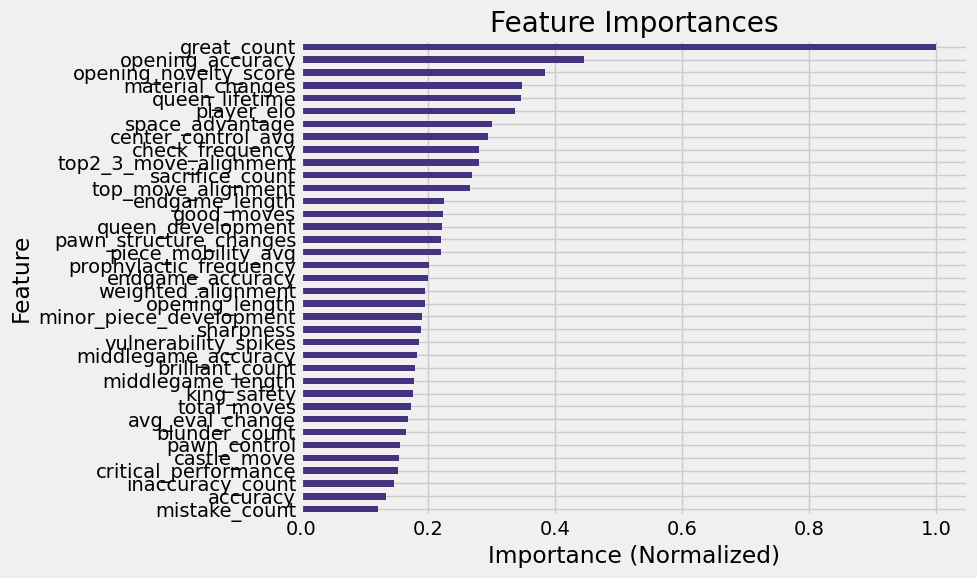

PCA explained variance ratios: [0.38529566 0.30000405 0.10463962]


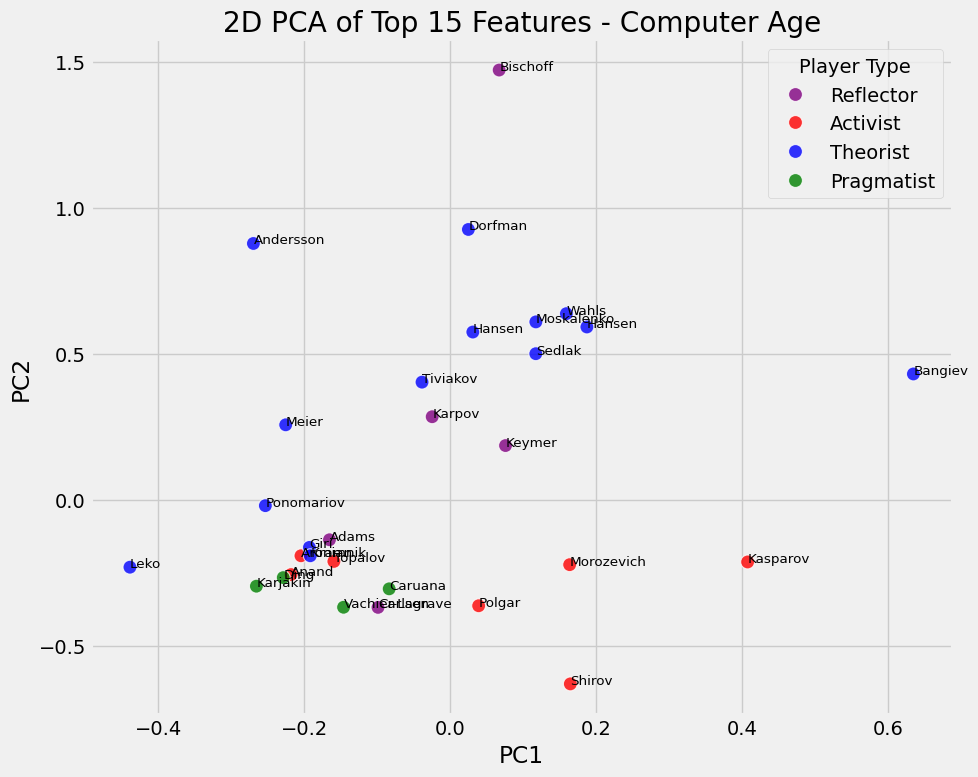

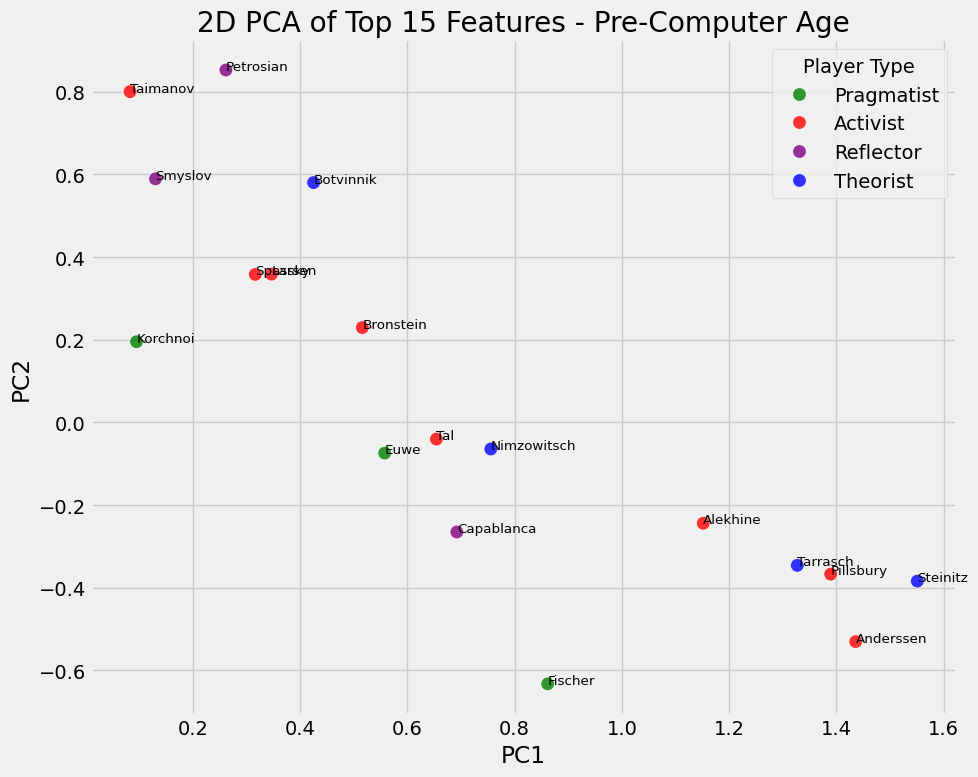

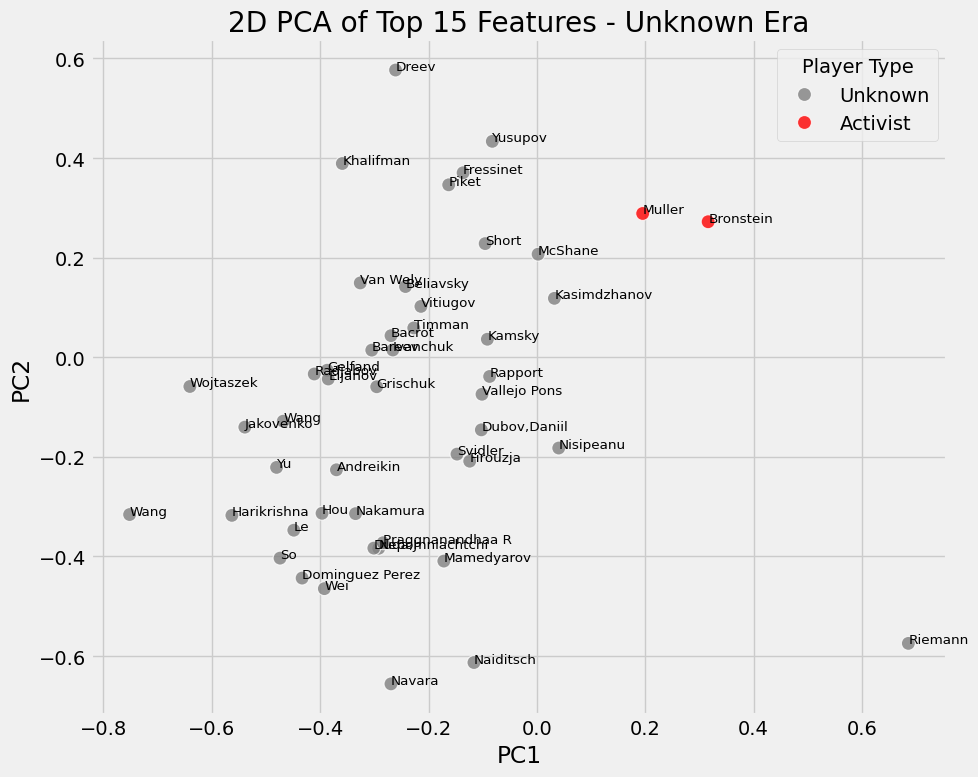

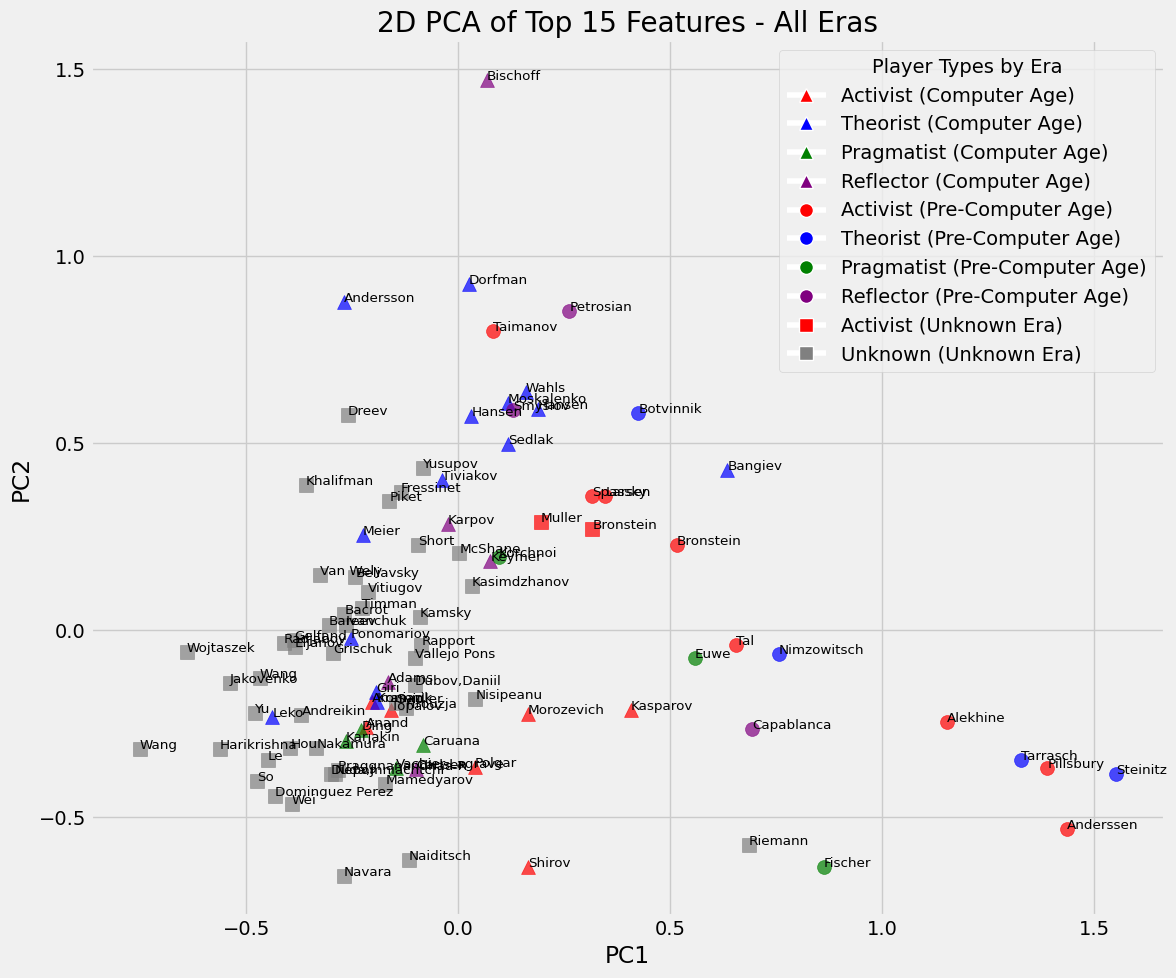


Calculating Decision Boundary Score for Computer Age:
  AUC for Activist: 1.0000
  AUC for Pragmatist: 0.4000
  AUC for Reflector: 0.2000
  AUC for Theorist: 1.0000
  Mean AUC Score for Computer Age: 0.6500

Calculating Decision Boundary Score for Pre-Computer Age:
  AUC for Activist: 0.2500
  AUC for Pragmatist: 0.0000
  AUC for Reflector: nan
  AUC for Theorist: 0.3333
  Mean AUC Score for Pre-Computer Age: nan

Calculating Decision Boundary Score for Unknown Era:
  AUC for Activist: nan
  AUC for Unknown: nan
  Mean AUC Score for Unknown Era: nan

Calculating Combined Decision Boundary Score:
  AUC for Activist: 0.6875
  AUC for Pragmatist: 0.2222
  AUC for Reflector: 0.7407
  AUC for Theorist: 0.6848
  AUC for Unknown: 0.9143
Combined Mean AUC Score: 0.6499

SUPERVISED LEARNING RESULTS:
Training on 50 labeled players
Distribution of player types: {'Theorist': 18, 'Activist': 17, 'Reflector': 8, 'Pragmatist': 7}

Random Forest Results:
  Fold 1 - Accuracy: 0.4000
  Fold 2 - Accurac

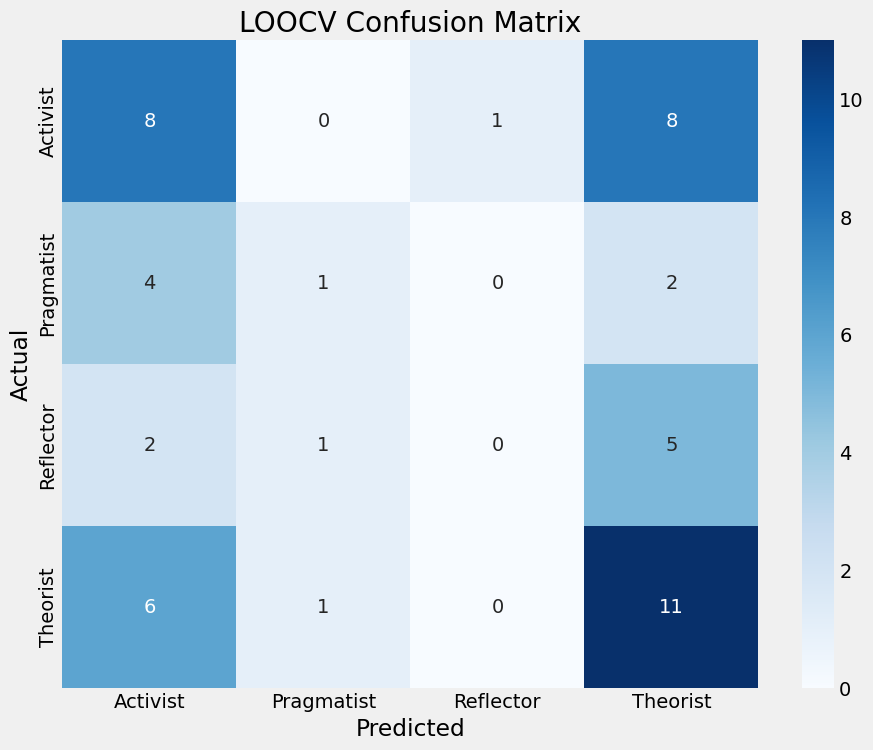


ENSEMBLE MODELS RESULTS:
Voting Classifier - Mean Accuracy: 0.3600 (±0.0800)
Stacking Classifier - Mean Accuracy: 0.4400 (±0.0490)

SEMI-SUPERVISED LEARNING RESULTS:
Training semi-supervised model on 50 labeled and 46 unlabeled players
Semi-supervised model accuracy on labeled data: 0.5000
Newly labeled players: 46

Per-class metrics on labeled data:
Error in semi-supervised learning: Found input variables with inconsistent numbers of samples: [50, 17]
Falling back to supervised classification for unlabeled data...
Labeled 46 players using supervised learning.

MODEL ANALYSIS:

Classification Report:
              precision    recall  f1-score   support

    Activist       1.00      1.00      1.00         5
  Pragmatist       1.00      1.00      1.00         2
   Reflector       1.00      1.00      1.00         2
    Theorist       1.00      1.00      1.00         6

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted av

<Figure size 1000x800 with 0 Axes>

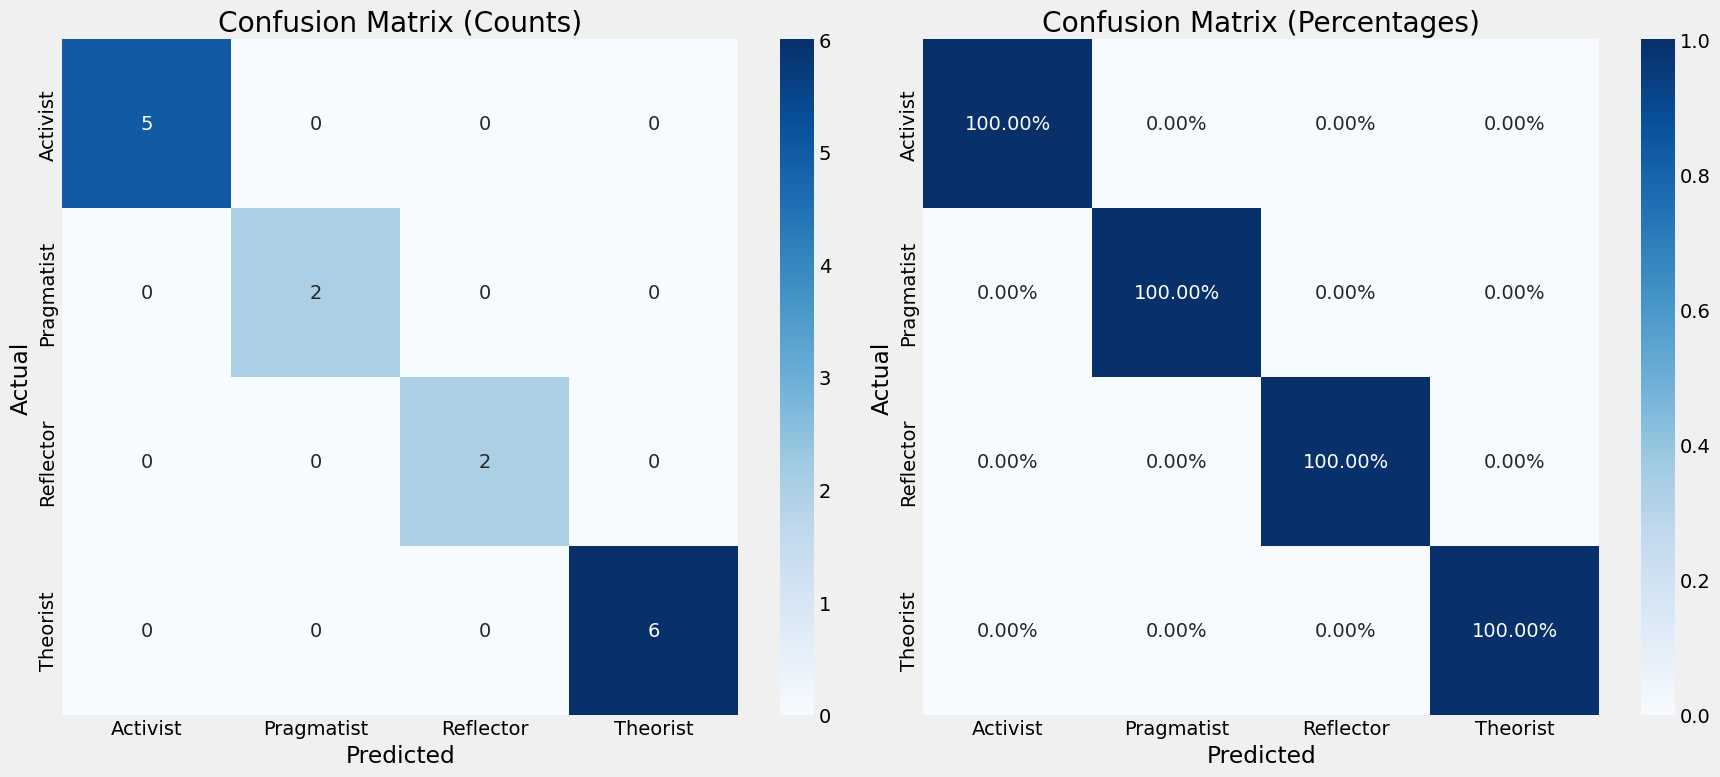

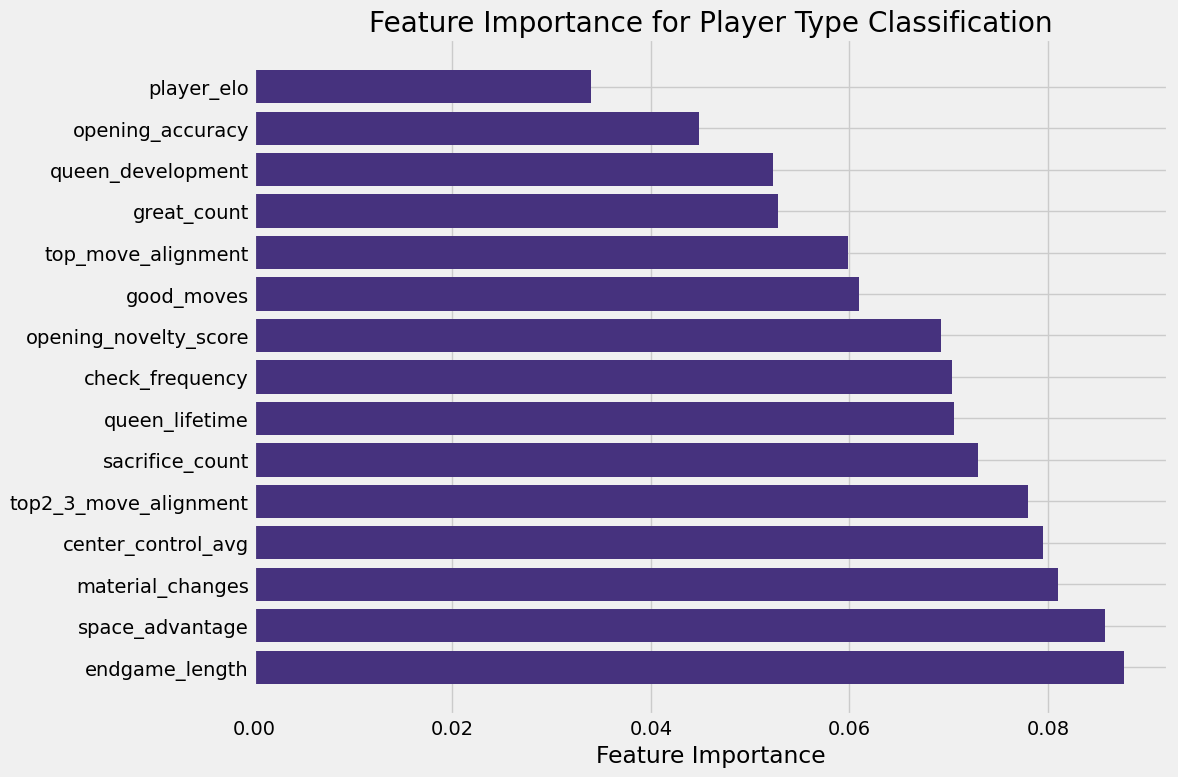


Top Features by Player Type:

  Top 5 features for Activist:
    1. endgame_length (0.3968)
    2. space_advantage (0.1159)
    3. great_count (0.1053)
    4. top_move_alignment (0.0576)
    5. player_elo (0.0538)

  Top 5 features for Pragmatist:
    1. good_moves (0.2087)
    2. opening_novelty_score (0.1694)
    3. opening_accuracy (0.1620)
    4. endgame_length (0.1336)
    5. queen_lifetime (0.1127)

  Top 5 features for Reflector:
    1. check_frequency (0.1786)
    2. endgame_length (0.1463)
    3. queen_lifetime (0.1385)
    4. space_advantage (0.1337)
    5. top2_3_move_alignment (0.0992)

  Top 5 features for Theorist:
    1. material_changes (0.3378)
    2. check_frequency (0.1835)
    3. center_control_avg (0.1362)
    4. endgame_length (0.1135)
    5. great_count (0.0987)

PREDICTING UNKNOWN PLAYERS:
Predicting types for 46 unknown players...

Predicted Player Types:
  Theorist: 38 players
  Activist: 8 players

FINAL VISUALIZATION:


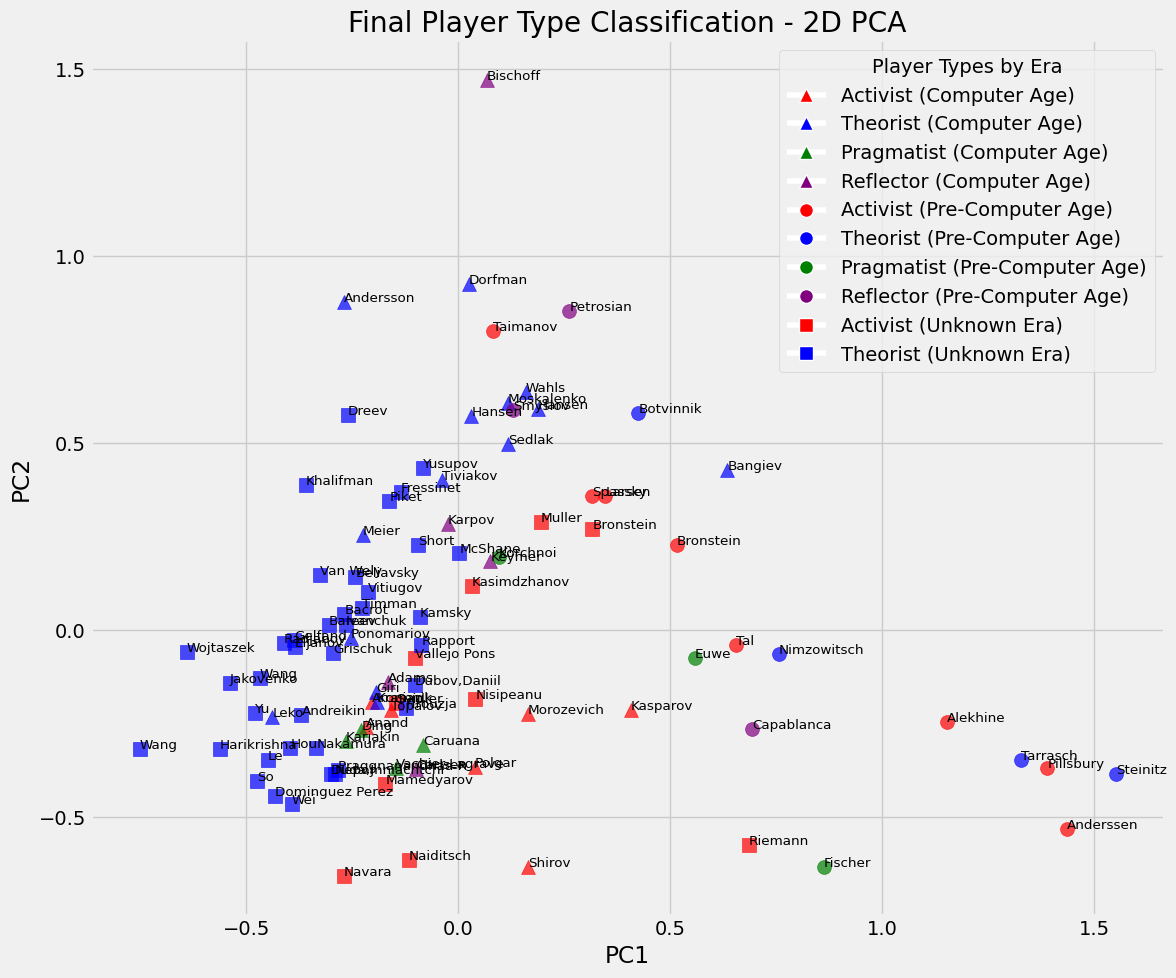


Results saved to 'chess_player_classification_results.csv'


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                    StratifiedKFold, LeaveOneOut, 
                                    RepeatedStratifiedKFold)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, classification_report, confusion_matrix,
                           roc_auc_score)
from sklearn.semi_supervised import LabelSpreading
from sklearn.base import clone
import warnings
warnings.filterwarnings('ignore')

# -------------------------------
# Define Known Player Types by Era
# -------------------------------
activist_pre_computer = [
    "Alekhine", "Tal", "Spassky", "Pillsbury",
    "Anderssen", "Bronstein, David", "Larsen", "Taimanov"
]

activist_computer_age = [
    "Kasparov", "Anand", "Shirov", "Morozevich",
    "Topalov", "Aronian", "Polgar", "Müller"
]

theorist_pre_computer = [
    "Steinitz", "Botvinnik", "Tarrasch", "Nimzowitsch"
]

theorist_computer_age = [
    "Kramnik", "Leko", "Giri", "Meier", "Andersson",
    "Sedlak", "Tiviakov", "Ponomariov", "Wahls",
    "Moskalenko", "Dorfman", "Bangiev", "Hansen"
]

reflector_pre_computer = [
    "Capablanca", "Smyslov", "Petrosian"
]

reflector_computer_age = [
    "Karpov", "Carlsen", "Adams, Michael", "Keymer", "Bischoff"
]

pragmatist_pre_computer = [
    "Fischer", "Euwe", "Korchnoi"
]

pragmatist_computer_age = [
    "Caruana", "Ding", "Karjakin", "Vachier-Lagrave"
]

# -------------------------------
# Step 1. Aggregate Game-Level Data to Player Level
# -------------------------------
def aggregate_player_data(players_df, min_games=100):
    """
    Aggregate game-level data into a player-level DataFrame.
    Only players with at least `min_games` games are included.
    Averages are computed for numeric features.
    'None' player types are replaced with 'Unknown'.
    """
    # Identify players with enough games
    game_counts = players_df['player_name'].value_counts()
    players_with_enough_games = game_counts[game_counts >= min_games].index.tolist()
    print(f"Found {len(players_with_enough_games)} players with at least {min_games} games.")

    # Filter to these players
    filtered_df = players_df[players_df['player_name'].isin(players_with_enough_games)].copy()

    # Columns that we will ignore for numeric aggregation
    ignore_cols = ['player_name', 'player_color', 'opponent_name', 'game_id', 'result', 'player_type']
    numeric_cols = [col for col in filtered_df.columns
                    if col not in ignore_cols and pd.api.types.is_numeric_dtype(filtered_df[col])]

    aggregated_data = []

    for player in players_with_enough_games:
        player_games = filtered_df[filtered_df['player_name'] == player]
        # Get the first non-NaN player_type if available, default to 'Unknown'
        if 'player_type' in player_games.columns:
            p_type_series = player_games['player_type'].dropna()
            p_type = p_type_series.iloc[0] if not p_type_series.empty else 'Unknown'
        else:
            p_type = 'Unknown'

        player_stats = {
            'player_name': player,
            'player_type': p_type,
            'num_games': len(player_games)
        }
        # Compute averages for each numeric feature
        for col in numeric_cols:
            player_stats[col] = player_games[col].mean()
        aggregated_data.append(player_stats)

    agg_df = pd.DataFrame(aggregated_data)
    return agg_df

# -------------------------------
# Step 2. Categorize Players into Pre-Computer and Computer Age Eras
# -------------------------------
def categorize_players_by_era(agg_df):
    """
    Categorize players into "Pre-Computer Age" and "Computer Age" based on
    their presence in the known player lists.
    """
    # Add era column, default to 'Unknown Era'
    agg_df['era'] = 'Unknown Era'
    
    # For tracking assignment stats
    assigned_type_count = 0
    assigned_era_count = 0
    
    # Categorize players by type and era
    for idx, player in agg_df.iterrows():
        player_name = player['player_name']
        original_type = player['player_type']
        
        # Check all known player categories
        if any(name in player_name for name in activist_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Activist'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in activist_computer_age):
            agg_df.at[idx, 'player_type'] = 'Activist'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in theorist_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Theorist'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in theorist_computer_age):
            agg_df.at[idx, 'player_type'] = 'Theorist'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in reflector_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Reflector'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in reflector_computer_age):
            agg_df.at[idx, 'player_type'] = 'Reflector'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in pragmatist_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Pragmatist'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in pragmatist_computer_age):
            agg_df.at[idx, 'player_type'] = 'Pragmatist'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        else:
            # Try to extract birth/death years from player names if we didn't match a known player
            import re
            birth_year = None
            
            # Look for years in parentheses in the player name
            year_pattern = r'\((\d{4})[-–](\d{4}|\?{4}|\d{0})\)'
            match = re.search(year_pattern, player_name)
            
            if match:
                # Found birth-death years pattern
                birth_year = int(match.group(1))
                
                # Assume a player's prime playing years are ~20-30 years after birth
                prime_playing_year = birth_year + 30
                if prime_playing_year < 1990:  # 1990 as computer age threshold
                    agg_df.at[idx, 'era'] = 'Pre-Computer Age'
                    assigned_era_count += 1
                else:
                    agg_df.at[idx, 'era'] = 'Computer Age'
                    assigned_era_count += 1
    
    # Summary of the categorization
    print(f"\nAssigned player types for {assigned_type_count} players from provided lists")
    print(f"Assigned eras for {assigned_era_count} players")
    
    era_counts = agg_df['era'].value_counts()
    print("\nPlayer Era Categorization:")
    for era, count in era_counts.items():
        print(f"  {era}: {count} players")
    
    # Count player types in each era
    for era in agg_df['era'].unique():
        era_df = agg_df[agg_df['era'] == era]
        print(f"\nPlayer Types in {era}:")
        type_counts = era_df['player_type'].value_counts()
        for player_type, count in type_counts.items():
            print(f"  {player_type}: {count} players")
    
    return agg_df

# -------------------------------
# Step 3. Select Best Features using RandomForest Importance
# -------------------------------
def select_best_features(agg_df, n_features=15, importance_threshold=0.1):
    """
    Select best numeric features using RandomForestClassifier importance
    with 'player_type' as the target.
    """
    metadata = ['player_name', 'player_type', 'num_games', 'era']
    numeric_cols = [col for col in agg_df.columns if col not in metadata and pd.api.types.is_numeric_dtype(agg_df[col])]

    X = agg_df[numeric_cols]
    y = agg_df['player_type']

    # Encode player_type as numeric
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Impute and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_imputed = imputer.fit_transform(X)
    X_scaled = scaler.fit_transform(X_imputed)

    # Train RandomForest classifier
    rf = RandomForestClassifier(n_estimators=1500, random_state=42)
    rf.fit(X_scaled, y_encoded)

    importances = rf.feature_importances_
    importance_series = pd.Series(importances, index=numeric_cols)

    # Normalize importances to the maximum value
    importance_series = importance_series / importance_series.max()

    # Select features above the importance threshold
    selected = importance_series[importance_series > importance_threshold].index.tolist()

    # If more than desired n_features, choose the top n_features based on importance
    if len(selected) > n_features:
        selected = importance_series.sort_values(ascending=False).index[:n_features].tolist()

    print("\nSelected features:", selected)

    # Visualize feature importances
    plt.figure(figsize=(10, 6))
    importance_series.sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importances')
    plt.xlabel('Importance (Normalized)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return selected

# -------------------------------
# Step 4. Apply PCA to Selected Features
# -------------------------------
def apply_pca(agg_df, features, n_components=3):
    """
    Scale the selected features, apply PCA and return the transformed data.
    """
    X = agg_df[features]
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()

    X_imputed = imputer.fit_transform(X)
    X_scaled = scaler.fit_transform(X_imputed)

    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    print(f"PCA explained variance ratios: {pca.explained_variance_ratio_}")
    return X_pca, pca

# -------------------------------
# Step 5. Visualize 2D PCA Result using Seaborn 
# -------------------------------
def visualize_2d_pca(agg_df, X_pca_2d):
    """
    Visualize 2D PCA result with separate plots for each era, and a combined view.
    """
    pca_df = pd.DataFrame({
        'PC1': X_pca_2d[:, 0],
        'PC2': X_pca_2d[:, 1],
        'player_type': agg_df['player_type'],
        'player_name': agg_df['player_name'],
        'era': agg_df['era'],
        'num_games': agg_df['num_games']
    })

    # Define color palette for player types
    palette = {
        'Activist': 'red',
        'Theorist': 'blue',
        'Pragmatist': 'green',
        'Reflector': 'purple',
        'Unknown': 'gray'
    }
    
    # Create separate plots for each era
    eras = pca_df['era'].unique()
    
    for era in eras:
        era_df = pca_df[pca_df['era'] == era]
        
        if len(era_df) < 2:  # Skip if not enough players
            print(f"Skipping visualization for {era} (insufficient data)")
            continue
            
        plt.figure(figsize=(10, 8))
        ax = sns.scatterplot(data=era_df, x='PC1', y='PC2', hue='player_type',
                         palette=palette, s=100, alpha=0.8)

        # Add labels for each point
        for i, row in era_df.iterrows():
            player_name = row['player_name']
            if ', ' in player_name:
                last_name = player_name.split(', ')[0]
                ax.text(row['PC1'], row['PC2'], last_name, 
                       horizontalalignment='left', size='x-small', color='black')
            else:
                ax.text(row['PC1'], row['PC2'], player_name, 
                       horizontalalignment='left', size='x-small', color='black')

        plt.title(f'2D PCA of Top 15 Features - {era}')
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(title='Player Type')
        plt.tight_layout()
        plt.show()

    # Create combined visualization with different markers for each era
    plt.figure(figsize=(12, 10))
    
    # Define markers for eras
    markers = {'Pre-Computer Age': 'o', 'Computer Age': '^', 'Unknown Era': 's'}
    
    # Create a custom legend elements list
    from matplotlib.lines import Line2D
    legend_elements = []
    
    # Plot each era and player type combination separately
    for era in eras:
        for p_type in palette.keys():
            # Get the subset of data for this era and player type
            subset = pca_df[(pca_df['era'] == era) & (pca_df['player_type'] == p_type)]
            if not subset.empty:
                plt.scatter(subset['PC1'], subset['PC2'], 
                           color=palette[p_type], 
                           marker=markers[era],
                           s=100, 
                           alpha=0.7,
                           label=f"{p_type} ({era})")
                
                # Add this combination to the legend
                legend_elements.append(
                    Line2D([0], [0], marker=markers[era], color='w', 
                          markerfacecolor=palette[p_type], markersize=10, 
                          label=f"{p_type} ({era})")
                )
    
    # Add player name labels
    for i, row in pca_df.iterrows():
        player_name = row['player_name']
        if ', ' in player_name:
            last_name = player_name.split(', ')[0]
            plt.text(row['PC1'], row['PC2'], last_name, 
                   horizontalalignment='left', size='x-small', color='black')
        else:
            plt.text(row['PC1'], row['PC2'], player_name, 
                   horizontalalignment='left', size='x-small', color='black')
    
    plt.title('2D PCA of Top 15 Features - All Eras')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(handles=legend_elements, loc='best', title="Player Types by Era")
    plt.tight_layout()
    plt.show()

# -------------------------------
# Step 6. Create Interactive 3D PCA Visualization
# -------------------------------
def visualize_3d_pca(agg_df, X_pca_3d):
    """
    Create interactive 3D scatter plots of the PCA result using Plotly Express.
    """
    pca_df = pd.DataFrame({
        'PC1': X_pca_3d[:, 0],
        'PC2': X_pca_3d[:, 1],
        'PC3': X_pca_3d[:, 2],
        'player_type': agg_df['player_type'],
        'player_name': agg_df['player_name'],
        'era': agg_df['era'],
        'num_games': agg_df['num_games']
    })

    # Define color map for player types
    color_map = {
        'Activist': 'red',
        'Theorist': 'blue',
        'Pragmatist': 'green',
        'Reflector': 'purple',
        'Unknown': 'gray'
    }

    # Create separate plots for each era
    for era in pca_df['era'].unique():
        era_df = pca_df[pca_df['era'] == era]
        
        if len(era_df) < 2:  # Skip if not enough players
            print(f"Skipping 3D visualization for {era} (insufficient data)")
            continue
        
        fig = px.scatter_3d(
            era_df,
            x='PC1', y='PC2', z='PC3',
            color='player_type',
            hover_data=['player_name', 'num_games'],
            color_discrete_map=color_map,
            title=f'3D PCA of Player Features - {era}'
        )
        fig.update_traces(marker=dict(size=5))
        fig.show()
    
    # Create a combined visualization with both color and symbol
    fig = px.scatter_3d(
        pca_df,
        x='PC1', y='PC2', z='PC3',
        color='player_type',
        symbol='era',  # Use era for different marker symbols
        hover_data=['player_name', 'num_games', 'era'],
        color_discrete_map=color_map,
        title='3D PCA of Player Features - All Eras Combined'
    )
    fig.update_traces(marker=dict(size=5))
    fig.show()

# -------------------------------
# Step 7. Calculate Decision Boundary Quality (AUC)
# -------------------------------
def calculate_decision_boundary_score(agg_df):
    """
    Calculate the Area Under the ROC Curve (AUC) for predicting player_type.
    """
    # Calculate separately for each era
    for era in agg_df['era'].unique():
        era_df = agg_df[agg_df['era'] == era].copy()
        
        # Skip if too few samples or not enough player types
        if len(era_df) < 10 or era_df['player_type'].nunique() <= 1:
            print(f"Skipping AUC calculation for {era} (insufficient data)")
            continue
            
        print(f"\nCalculating Decision Boundary Score for {era}:")
        
        # Encode player types
        le = LabelEncoder()
        era_df['player_type'] = le.fit_transform(era_df['player_type'])
        
        # Define features
        metadata = ['player_name', 'player_type', 'num_games', 'era']
        numeric_cols = [col for col in era_df.columns if col not in metadata and pd.api.types.is_numeric_dtype(era_df[col])]
        
        X = era_df[numeric_cols]
        y = era_df['player_type']
        
        # Prepare the data
        imputer = SimpleImputer(strategy='mean')
        scaler = MinMaxScaler()
        X_imputed = imputer.fit_transform(X)
        X_scaled = scaler.fit_transform(X_imputed)
        
        # Use stratified sampling to maintain class distribution
        try:
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=42, stratify=y
            )
            
            # Train RandomForest and get predictions
            rf = RandomForestClassifier(n_estimators=100, random_state=42)
            rf.fit(X_train, y_train)
            y_pred_proba = rf.predict_proba(X_test)
            
            # Calculate AUC for each class
            auc_scores = []
            for i in range(len(le.classes_)):
                if i < y_pred_proba.shape[1]:
                    try:
                        auc = roc_auc_score(y_test == i, y_pred_proba[:, i])
                        class_name = le.inverse_transform([i])[0]
                        print(f"  AUC for {class_name}: {auc:.4f}")
                        auc_scores.append(auc)
                    except ValueError as e:
                        print(f"  Error calculating AUC for class {i}: {e}")
            
            if auc_scores:
                mean_auc = np.mean(auc_scores)
                print(f"  Mean AUC Score for {era}: {mean_auc:.4f}")
        
        except Exception as e:
            print(f"  Could not calculate AUC for {era}: {e}")
    
    # Calculate for all players combined
    print("\nCalculating Combined Decision Boundary Score:")
    
    # Prepare data
    agg_df_copy = agg_df.copy()
    le = LabelEncoder()
    agg_df_copy['player_type'] = le.fit_transform(agg_df_copy['player_type'])

    # Select features
    metadata = ['player_name', 'player_type', 'num_games', 'era']
    numeric_cols = [col for col in agg_df_copy.columns if col not in metadata and pd.api.types.is_numeric_dtype(agg_df_copy[col])]

    X = agg_df_copy[numeric_cols]
    y = agg_df_copy['player_type']

    # Process the data
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_imputed = imputer.fit_transform(X)
    X_scaled = scaler.fit_transform(X_imputed)

    # Train/test split with stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    # Train and evaluate
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_proba = rf.predict_proba(X_test)

    # Calculate AUC for each class
    auc_scores = []
    for i in range(len(le.classes_)):
        try:
            auc = roc_auc_score(y_test == i, y_pred_proba[:, i])
            class_name = le.inverse_transform([i])[0]
            print(f"  AUC for {class_name}: {auc:.4f}")
            auc_scores.append(auc)
        except ValueError as e:
            print(f"  Error for class {i}: {e}")

    if auc_scores:
        mean_auc = np.mean(auc_scores)
        print(f"Combined Mean AUC Score: {mean_auc:.4f}")

# -------------------------------
# Step 8. Train Supervised Models with Cross-Validation
# -------------------------------
def train_supervised_models(agg_df, selected_features):
    """
    Train supervised models using only labeled data with cross-validation.
    Include detailed metrics for each player type.
    """
    # Filter to only players with known types (not 'Unknown')
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    print(f"Training on {len(labeled_df)} labeled players")
    print(f"Distribution of player types: {labeled_df['player_type'].value_counts().to_dict()}")
    
    # Use only available selected features
    features_to_use = [f for f in selected_features if f in labeled_df.columns]
    
    X = labeled_df[features_to_use]
    y = labeled_df['player_type']
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X))
    
    # Define models to test
    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(probability=True, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=3),
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
    }
    
    # Set up cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Dictionary to store results
    cv_results = {}
    
    # Get unique classes
    unique_classes = np.unique(y)
    
    for model_name, model in models.items():
        print(f"\n{model_name} Results:")
        
        # Lists to store metrics from each fold
        all_accuracies = []
        per_class_precision = {cls: [] for cls in unique_classes}
        per_class_recall = {cls: [] for cls in unique_classes}
        per_class_f1 = {cls: [] for cls in unique_classes}
        per_class_auc = {cls: [] for cls in unique_classes}
        
        # Cross-validation loop
        fold_num = 1
        for train_idx, test_idx in cv.split(X_processed, y):
            X_train, X_test = X_processed[train_idx], X_processed[test_idx]
            y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
            
            # Train model
            model.fit(X_train, y_train)
            
            # Evaluate on test fold
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            all_accuracies.append(accuracy)
            
            # Calculate metrics for each class
            for cls in unique_classes:
                prec = precision_score(y_test == cls, y_pred == cls, zero_division=0)
                rec = recall_score(y_test == cls, y_pred == cls, zero_division=0)
                f1 = f1_score(y_test == cls, y_pred == cls, zero_division=0)
                
                per_class_precision[cls].append(prec)
                per_class_recall[cls].append(rec)
                per_class_f1[cls].append(f1)
                
                # Try to calculate AUC if the model supports predict_proba
                if hasattr(model, 'predict_proba'):
                    try:
                        proba = model.predict_proba(X_test)
                        # Find the index of this class
                        cls_idx = np.where(model.classes_ == cls)[0][0]
                        auc = roc_auc_score(y_test == cls, proba[:, cls_idx])
                        per_class_auc[cls].append(auc)
                    except:
                        per_class_auc[cls].append(np.nan)
            
            # Print fold results
            print(f"  Fold {fold_num} - Accuracy: {accuracy:.4f}")
            fold_num += 1
        
        # Calculate mean and std of overall accuracy
        mean_accuracy = np.mean(all_accuracies)
        std_accuracy = np.std(all_accuracies)
        
        print(f"  Overall - Mean Accuracy: {mean_accuracy:.4f} (±{std_accuracy:.4f})")
        
        # Print per-class metrics
        print("\n  Per-Class Metrics:")
        for cls in unique_classes:
            cls_prec_mean = np.mean(per_class_precision[cls])
            cls_rec_mean = np.mean(per_class_recall[cls])
            cls_f1_mean = np.mean(per_class_f1[cls])
            
            print(f"    {cls}:")
            print(f"      Precision: {cls_prec_mean:.4f}")
            print(f"      Recall:    {cls_rec_mean:.4f}")
            print(f"      F1 Score:  {cls_f1_mean:.4f}")
            
            if per_class_auc[cls] and not all(np.isnan(per_class_auc[cls])):
                cls_auc_mean = np.nanmean(per_class_auc[cls])
                print(f"      AUC:       {cls_auc_mean:.4f}")
        
        # Store overall results
        cv_results[model_name] = (mean_accuracy, std_accuracy)
    
    # Find best model
    best_model_name = max(cv_results.items(), key=lambda x: x[1][0])[0]
    best_model = models[best_model_name]
    
    # Train the best model on all labeled data
    best_model.fit(X_processed, y)
    
    print(f"\nBest model: {best_model_name} with accuracy {cv_results[best_model_name][0]:.4f}")
    
    return cv_results, best_model, features_to_use

# -------------------------------
# Step 9. Evaluate with Advanced Cross-Validation
# -------------------------------
def evaluate_with_advanced_cv(agg_df, selected_features):
    """
    Evaluate models using advanced CV strategies for small datasets.
    Include detailed metrics by player type.
    """
    # Filter to only labeled data
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    # Prepare features and target
    features_to_use = [f for f in selected_features if f in labeled_df.columns]
    
    X = labeled_df[features_to_use]
    y = labeled_df['player_type']
    
    # Get unique classes
    unique_classes = np.unique(y)
    
    # Handle missing values and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X))
    
    # 1. Leave-One-Out Cross-Validation (LOOCV)
    print("\n1. Leave-One-Out CV Results:")
    loo = LeaveOneOut()
    model_loocv = RandomForestClassifier(n_estimators=100, random_state=42)
    
    loocv_preds = []
    loocv_actual = []
    loocv_player_names = []
    
    for train_idx, test_idx in loo.split(X_processed):
        X_train, X_test = X_processed[train_idx], X_processed[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model_loocv.fit(X_train, y_train)
        pred = model_loocv.predict(X_test)[0]
        actual = y_test.iloc[0]
        
        loocv_preds.append(pred)
        loocv_actual.append(actual)
        loocv_player_names.append(labeled_df.iloc[test_idx[0]]['player_name'])
    
    loocv_acc = accuracy_score(loocv_actual, loocv_preds)
    print(f"LOOCV Overall Accuracy: {loocv_acc:.4f}")
    
    # Calculate per-class metrics for LOOCV
    print("\nLOOCV Per-Class Metrics:")
    for cls in unique_classes:
        # Create mask for this class
        cls_mask = np.array(loocv_actual) == cls
        if sum(cls_mask) > 0:
            cls_acc = accuracy_score(
                np.array(loocv_actual)[cls_mask], 
                np.array(loocv_preds)[cls_mask]
            )
            cls_prec = precision_score(
                np.array(loocv_actual) == cls, 
                np.array(loocv_preds) == cls,
                zero_division=0
            )
            cls_rec = recall_score(
                np.array(loocv_actual) == cls, 
                np.array(loocv_preds) == cls,
                zero_division=0
            )
            cls_f1 = f1_score(
                np.array(loocv_actual) == cls, 
                np.array(loocv_preds) == cls,
                zero_division=0
            )
            
            print(f"  {cls} (n={sum(cls_mask)}):")
            print(f"    Accuracy:  {cls_acc:.4f}")
            print(f"    Precision: {cls_prec:.4f}")
            print(f"    Recall:    {cls_rec:.4f}")
            print(f"    F1 Score:  {cls_f1:.4f}")
    
    # Show misclassified players in LOOCV
    print("\nMisclassified Players in LOOCV:")
    misclassified = [(name, actual, pred) for name, actual, pred in 
                    zip(loocv_player_names, loocv_actual, loocv_preds) 
                    if actual != pred]
    
    if misclassified:
        for name, actual, pred in misclassified:
            print(f"  {name}: {actual} → {pred}")
    else:
        print("  None")
    
    # 2. Repeated Stratified K-Fold
    print("\n2. Repeated Stratified K-Fold Results:")
    rskf = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)
    model_rskf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Overall scores
    rskf_scores = []
    
    # Per-class metrics
    per_class_precision = {cls: [] for cls in unique_classes}
    per_class_recall = {cls: [] for cls in unique_classes}
    per_class_f1 = {cls: [] for cls in unique_classes}
    per_class_auc = {cls: [] for cls in unique_classes}
    
    for train_idx, test_idx in rskf.split(X_processed, y):
        X_train, X_test = X_processed[train_idx], X_processed[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        model_rskf.fit(X_train, y_train)
        preds = model_rskf.predict(X_test)
        
        # Overall accuracy
        acc = accuracy_score(y_test, preds)
        rskf_scores.append(acc)
        
        # Per-class metrics
        for cls in unique_classes:
            # Skip if class not in test set
            if sum(y_test == cls) == 0:
                continue
                
            prec = precision_score(y_test == cls, preds == cls, zero_division=0)
            rec = recall_score(y_test == cls, preds == cls, zero_division=0)
            f1 = f1_score(y_test == cls, preds == cls, zero_division=0)
            
            per_class_precision[cls].append(prec)
            per_class_recall[cls].append(rec)
            per_class_f1[cls].append(f1)
            
            # Try to calculate AUC
            try:
                proba = model_rskf.predict_proba(X_test)
                cls_idx = np.where(model_rskf.classes_ == cls)[0][0]
                auc = roc_auc_score(y_test == cls, proba[:, cls_idx])
                per_class_auc[cls].append(auc)
            except:
                pass
    
    # Print overall results
    mean_rskf_acc = np.mean(rskf_scores)
    std_rskf_acc = np.std(rskf_scores)
    print(f"Repeated Stratified K-Fold Overall Accuracy: {mean_rskf_acc:.4f} (±{std_rskf_acc:.4f})")
    
    # Print per-class results
    print("\nRepeated Stratified K-Fold Per-Class Metrics:")
    for cls in unique_classes:
        if per_class_precision[cls]:
            mean_prec = np.mean(per_class_precision[cls])
            mean_rec = np.mean(per_class_recall[cls])
            mean_f1 = np.mean(per_class_f1[cls])
            
            print(f"  {cls}:")
            print(f"    Precision: {mean_prec:.4f}")
            print(f"    Recall:    {mean_rec:.4f}")
            print(f"    F1 Score:  {mean_f1:.4f}")
            
            if per_class_auc[cls]:
                mean_auc = np.mean(per_class_auc[cls])
                print(f"    AUC:       {mean_auc:.4f}")
    
    # Confusion matrix from LOOCV
    print("\nLOOCV Confusion Matrix:")
    cm = confusion_matrix(loocv_actual, loocv_preds, labels=unique_classes)
    print(cm)
    
    # Visualize confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=unique_classes, yticklabels=unique_classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('LOOCV Confusion Matrix')
    plt.show()
    
    return {
        'loocv_accuracy': loocv_acc,
        'rskf_mean_accuracy': mean_rskf_acc,
        'rskf_std_accuracy': std_rskf_acc,
        'loocv_confusion_matrix': cm,
        'per_class_precision': per_class_precision,
        'per_class_recall': per_class_recall,
        'per_class_f1': per_class_f1,
        'per_class_auc': per_class_auc
    }

# -------------------------------
# Step 10. Train Ensemble Models for Small Data
# -------------------------------
def train_ensemble_for_small_data(agg_df, selected_features):
    """
    Use ensemble methods specifically designed for small datasets.
    """
    # Filter to labeled data
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    # Prepare features and target
    features_to_use = [f for f in selected_features if f in labeled_df.columns]
    
    X = labeled_df[features_to_use]
    y = labeled_df['player_type']
    
    # Preprocess data
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X))
    
    # Define base models
    base_models = [
        ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)),
        ('svm', SVC(probability=True, kernel='rbf', C=1.0, random_state=42)),
        ('knn', KNeighborsClassifier(n_neighbors=5, weights='distance'))
    ]
    
    # 1. Create a Voting Classifier
    voting_clf = VotingClassifier(estimators=base_models, voting='soft')
    
    # 2. Create a Stacking Classifier
    stacking_clf = StackingClassifier(
        estimators=base_models,
        final_estimator=LogisticRegression(max_iter=1000, random_state=42)
    )
    
    # Dictionary of ensemble models
    ensemble_models = {
        'Voting Classifier': voting_clf,
        'Stacking Classifier': stacking_clf
    }
    
    # Cross-validate each ensemble model
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for name, model in ensemble_models.items():
        cv_scores = cross_val_score(model, X_processed, y, cv=cv, scoring='accuracy')
        mean_score = np.mean(cv_scores)
        std_score = np.std(cv_scores)
        print(f"{name} - Mean Accuracy: {mean_score:.4f} (±{std_score:.4f})")
    
    # Train the best ensemble model on all labeled data
    best_ensemble = stacking_clf  # Stacking often performs better
    best_ensemble.fit(X_processed, y)
    
    return best_ensemble

# -------------------------------
# Step 11. Apply Semi-Supervised Learning
# -------------------------------
def train_semisupervised_model(agg_df, selected_features):
    """
    Apply semi-supervised learning to leverage both labeled and unlabeled data.
    """
    # Prepare data including unlabeled samples
    features_to_use = [f for f in selected_features if f in agg_df.columns]
    
    X = agg_df[features_to_use]
    y = agg_df['player_type'].copy()
    
    # Handle missing values
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X))
    
    # Create a mask for labeled data
    labeled_mask = (y != 'Unknown')
    
    # First encode all known labels
    le = LabelEncoder()
    known_labels = y[labeled_mask].values
    le.fit(known_labels)
    
    # Create array of encoded labels with -1 for unknown
    y_encoded = np.ones(len(y), dtype=np.int32) * -1
    y_encoded[labeled_mask] = le.transform(y[labeled_mask].values)
    
    # Apply Label Spreading (a semi-supervised algorithm)
    print(f"Training semi-supervised model on {np.sum(labeled_mask)} labeled and {np.sum(~labeled_mask)} unlabeled players")
    
    try:
        # Try with Label Spreading
        label_spread = LabelSpreading(kernel='knn', alpha=0.8, n_neighbors=min(7, np.sum(labeled_mask)-1))
        label_spread.fit(X_processed, y_encoded)
        
        # Get the predicted labels for all data points
        predicted_labels = label_spread.predict(X_processed)
        
        # Convert numeric labels back to string labels
        predicted_player_types = np.array(['Unknown'] * len(predicted_labels), dtype=object)
        valid_idx = (predicted_labels != -1)
        predicted_player_types[valid_idx] = le.inverse_transform(predicted_labels[valid_idx])
        
        # Create a new dataframe with predictions
        result_df = agg_df.copy()
        result_df['predicted_player_type'] = predicted_player_types
        
        # Evaluate on labeled data
        labeled_idx = np.where(labeled_mask)[0]
        accuracy = accuracy_score(y.iloc[labeled_idx], predicted_player_types[labeled_idx])
        
        print(f"Semi-supervised model accuracy on labeled data: {accuracy:.4f}")
        
        # Count newly labeled players
        newly_labeled = sum((result_df['player_type'] == 'Unknown') & 
                            (result_df['predicted_player_type'] != 'Unknown'))
        print(f"Newly labeled players: {newly_labeled}")
        
        # Calculate per-class metrics for labeled data
        print("\nPer-class metrics on labeled data:")
        for player_type in le.classes_:
            class_mask = (y.iloc[labeled_idx] == player_type)
            class_pred_mask = (predicted_player_types[labeled_idx] == player_type)
            
            if sum(class_mask) > 0:
                class_accuracy = accuracy_score(
                    class_mask, 
                    predicted_player_types[labeled_idx][class_mask] == player_type
                )
                class_precision = precision_score(class_mask, class_pred_mask, zero_division=0)
                class_recall = recall_score(class_mask, class_pred_mask, zero_division=0)
                class_f1 = f1_score(class_mask, class_pred_mask, zero_division=0)
                
                print(f"  {player_type}:")
                print(f"    Accuracy:  {class_accuracy:.4f}")
                print(f"    Precision: {class_precision:.4f}")
                print(f"    Recall:    {class_recall:.4f}")
                print(f"    F1 Score:  {class_f1:.4f}")
        
        return result_df, label_spread
        
    except Exception as e:
        print(f"Error in semi-supervised learning: {e}")
        print("Falling back to supervised classification for unlabeled data...")
        
        # Train a RandomForest on the labeled data only
        X_labeled = X_processed[labeled_mask]
        y_labeled = y[labeled_mask].values
        
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        rf.fit(X_labeled, y_labeled)
        
        # Predict the unlabeled data
        X_unlabeled = X_processed[~labeled_mask]
        predicted_unlabeled = rf.predict(X_unlabeled)
        
        # Create the result DataFrame
        result_df = agg_df.copy()
        result_df['predicted_player_type'] = y.values  # Start with original labels
        result_df.loc[~labeled_mask, 'predicted_player_type'] = predicted_unlabeled
        
        print(f"Labeled {sum(~labeled_mask)} players using supervised learning.")
        
        return result_df, rf

# -------------------------------
# Step 12. Analyze Classification Results
# -------------------------------
def analyze_classification_results(agg_df, model, feature_names):
    """
    Analyze model performance and feature importance with detailed metrics.
    """
    # Filter to only labeled data
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    X = labeled_df[feature_names]
    y = labeled_df['player_type']
    
    # Preprocess data
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_processed = scaler.fit_transform(imputer.fit_transform(X))
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Train model (if it's not already trained)
    if not hasattr(model, 'predict'):
        model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    # If the model has predict_proba, get class probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
    
    # Classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Overall Accuracy: {accuracy:.4f}")
    
    # Per-class metrics
    unique_classes = np.unique(y)
    print("\nDetailed Metrics by Player Type:")
    for i, player_type in enumerate(unique_classes):
        # Get indices for this class
        class_indices = (y_test == player_type)
        
        # Calculate metrics
        class_accuracy = accuracy_score(y_test[class_indices], y_pred[class_indices])
        class_precision = precision_score(y_test == player_type, y_pred == player_type, zero_division=0)
        class_recall = recall_score(y_test == player_type, y_pred == player_type, zero_division=0)
        class_f1 = f1_score(y_test == player_type, y_pred == player_type, zero_division=0)
        
        # Try to calculate AUC if possible
        if hasattr(model, "predict_proba"):
            try:
                class_auc = roc_auc_score(y_test == player_type, y_pred_proba[:, i])
                auc_str = f"AUC:       {class_auc:.4f}"
            except:
                auc_str = "AUC:       N/A"
        else:
            auc_str = "AUC:       N/A"
        
        # Print results
        print(f"\n  {player_type} (n={sum(class_indices)}):")
        print(f"    Accuracy:  {class_accuracy:.4f}")
        print(f"    Precision: {class_precision:.4f}")
        print(f"    Recall:    {class_recall:.4f}")
        print(f"    F1 Score:  {class_f1:.4f}")
        print(f"    {auc_str}")
    
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    # Calculate confusion matrix with normalization (showing percentages)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    # Plot raw counts
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=unique_classes, yticklabels=unique_classes, ax=ax1)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_title('Confusion Matrix (Counts)')
    
    # Plot percentages
    sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues', 
                xticklabels=unique_classes, yticklabels=unique_classes, ax=ax2)
    ax2.set_xlabel('Predicted')
    ax2.set_ylabel('Actual')
    ax2.set_title('Confusion Matrix (Percentages)')
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance (if the model supports it)
    if hasattr(model, 'feature_importances_'):
        plt.figure(figsize=(12, 8))
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.barh(range(len(indices)), importances[indices])
        plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance for Player Type Classification')
        plt.tight_layout()
        plt.show()
        
        # Print top 5 features for each class if model supports it
        if hasattr(model, 'estimators_'):
            print("\nTop Features by Player Type:")
            for i, player_type in enumerate(unique_classes):
                # Skip if we can't get feature importances for each class
                if not hasattr(model, 'estimators_') or i >= len(model.estimators_):
                    continue
                    
                # Get feature importances for this class
                try:
                    if hasattr(model.estimators_[i], 'feature_importances_'):
                        class_importances = model.estimators_[i].feature_importances_
                        class_indices = np.argsort(class_importances)[::-1][:5]  # Top 5
                        
                        print(f"\n  Top 5 features for {player_type}:")
                        for j, idx in enumerate(class_indices):
                            print(f"    {j+1}. {feature_names[idx]} ({class_importances[idx]:.4f})")
                except:
                    continue
    
    return {
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'confusion_matrix': cm,
        'accuracy': accuracy,
        'feature_importances': importances if hasattr(model, 'feature_importances_') else None
    }

# -------------------------------
# Step 13. Predict New Players' Types
# -------------------------------
def predict_player_types(agg_df, best_model, features_to_use):
    """
    Predict the types of players labeled as 'Unknown'.
    """
    # Get unknown players
    unknown_players = agg_df[agg_df['player_type'] == 'Unknown'].copy()
    
    if len(unknown_players) == 0:
        print("No unknown players to predict.")
        return agg_df
    
    print(f"Predicting types for {len(unknown_players)} unknown players...")
    
    # Get features of unknown players
    X_unknown = unknown_players[features_to_use]
    
    # Preprocess
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    
    # Fit on all data to ensure consistency
    X_all = agg_df[features_to_use]
    imputer.fit(X_all)
    X_unknown_imputed = imputer.transform(X_unknown)
    
    scaler.fit(imputer.transform(X_all))
    X_unknown_processed = scaler.transform(X_unknown_imputed)
    
    # Predict
    predictions = best_model.predict(X_unknown_processed)
    
    # Add predictions to the dataframe
    agg_df.loc[agg_df['player_type'] == 'Unknown', 'predicted_player_type'] = predictions
    
    # Count predictions by type
    print("\nPredicted Player Types:")
    pred_counts = pd.Series(predictions).value_counts()
    for p_type, count in pred_counts.items():
        print(f"  {p_type}: {count} players")
    
    return agg_df

# -------------------------------
# Step 14. Visualize Final Results
# -------------------------------
def visualize_final_results(agg_df, X_pca):
    """
    Visualize the final results after classification.
    """
    # Create dataframe with PCA coordinates
    pca_df = pd.DataFrame({
        'PC1': X_pca[:, 0],
        'PC2': X_pca[:, 1],
        'PC3': X_pca[:, 2] if X_pca.shape[1] > 2 else np.zeros(X_pca.shape[0]),
        'player_name': agg_df['player_name'],
        'era': agg_df['era'],
        'num_games': agg_df['num_games']
    })
    
    # Add player types - use predicted type if original is Unknown
    pca_df['player_type'] = agg_df.apply(
        lambda row: row['predicted_player_type'] if row['player_type'] == 'Unknown' else row['player_type'],
        axis=1
    )
    
    # Define color palette for player types
    palette = {
        'Activist': 'red',
        'Theorist': 'blue',
        'Pragmatist': 'green',
        'Reflector': 'purple',
        'Unknown': 'gray'
    }
    
    # Create combined visualization
    plt.figure(figsize=(12, 10))
    
    # Define markers for eras
    markers = {'Pre-Computer Age': 'o', 'Computer Age': '^', 'Unknown Era': 's'}
    
    # Create a custom legend elements list
    from matplotlib.lines import Line2D
    legend_elements = []
    
    # Plot each era and player type combination separately
    for era in pca_df['era'].unique():
        for p_type in palette.keys():
            if p_type == 'Unknown':
                continue  # Skip unknown types
                
            # Get the subset of data for this era and player type
            subset = pca_df[(pca_df['era'] == era) & (pca_df['player_type'] == p_type)]
            if not subset.empty:
                plt.scatter(subset['PC1'], subset['PC2'], 
                           color=palette[p_type], 
                           marker=markers[era],
                           s=100, 
                           alpha=0.7,
                           label=f"{p_type} ({era})")
                
                # Add this combination to the legend
                legend_elements.append(
                    Line2D([0], [0], marker=markers[era], color='w', 
                          markerfacecolor=palette[p_type], markersize=10, 
                          label=f"{p_type} ({era})")
                )
    
    # Add player name labels
    for i, row in pca_df.iterrows():
        player_name = row['player_name']
        if ', ' in player_name:
            last_name = player_name.split(', ')[0]
            plt.text(row['PC1'], row['PC2'], last_name, 
                   horizontalalignment='left', size='x-small', color='black')
        else:
            plt.text(row['PC1'], row['PC2'], player_name, 
                   horizontalalignment='left', size='x-small', color='black')
    
    plt.title('Final Player Type Classification - 2D PCA')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(handles=legend_elements, loc='best', title="Player Types by Era")
    plt.tight_layout()
    plt.show()
    
    # Create an interactive 3D visualization with Plotly
    if X_pca.shape[1] > 2:
        fig = px.scatter_3d(
            pca_df,
            x='PC1', y='PC2', z='PC3',
            color='player_type',
            symbol='era',
            hover_data=['player_name', 'num_games', 'era'],
            color_discrete_map=palette,
            title='Final Player Type Classification - 3D PCA'
        )
        fig.update_traces(marker=dict(size=5))
        fig.show()
    
    return pca_df

# -------------------------------
# Main Function
# -------------------------------
def classify_chess_players(input_file='player_centric_data.csv'):
    """
    Main function to run the chess player classification pipeline.
    """
    # Load the game-level data
    df = pd.read_csv(input_file)
    print(f"Loaded {len(df)} rows with {len(df.columns)} columns.")

    # 1. Aggregate to player level
    agg_df = aggregate_player_data(df, min_games=100)
    
    # 2. Categorize players into eras
    agg_df = categorize_players_by_era(agg_df)
    
    # Display data about the dataset
    print(f"\nDataset summary:")
    print(f"Total players: {len(agg_df)}")
    print(f"Players with known types: {len(agg_df[agg_df['player_type'] != 'Unknown'])}")
    print(f"Players with unknown types: {len(agg_df[agg_df['player_type'] == 'Unknown'])}")
    
    # 3. Select best features
    selected_features = select_best_features(agg_df, n_features=15, importance_threshold=0.1)

    # 4. Apply PCA
    X_pca, pca_model = apply_pca(agg_df, selected_features, n_components=3)

    # 5. Visualize initial PCA
    visualize_2d_pca(agg_df, X_pca[:, :2])
    visualize_3d_pca(agg_df, X_pca)

    # 6. Calculate initial decision boundary quality
    calculate_decision_boundary_score(agg_df)
    
    # 7. Train supervised models
    print("\n" + "="*50)
    print("SUPERVISED LEARNING RESULTS:")
    cv_results, best_model, features_to_use = train_supervised_models(agg_df, selected_features)
    
    # 8. Evaluate with advanced cross-validation
    print("\n" + "="*50)
    print("ADVANCED CROSS-VALIDATION RESULTS:")
    advanced_cv_results = evaluate_with_advanced_cv(agg_df, selected_features)
    
    # 9. Train ensemble models
    print("\n" + "="*50)
    print("ENSEMBLE MODELS RESULTS:")
    best_ensemble = train_ensemble_for_small_data(agg_df, selected_features)
    
    # 10. Apply semi-supervised learning
    print("\n" + "="*50)
    print("SEMI-SUPERVISED LEARNING RESULTS:")
    labeled_df, ssl_model = train_semisupervised_model(agg_df, selected_features)
    
    # 11. Analyze the best model
    print("\n" + "="*50)
    print("MODEL ANALYSIS:")
    analysis = analyze_classification_results(agg_df, best_model, features_to_use)
    
    # 12. Predict unknown players
    print("\n" + "="*50)
    print("PREDICTING UNKNOWN PLAYERS:")
    final_df = predict_player_types(labeled_df, best_ensemble, features_to_use)
    
    # 13. Visualize final results
    print("\n" + "="*50)
    print("FINAL VISUALIZATION:")
    final_pca_df = visualize_final_results(final_df, X_pca)
    
    # 14. Save results
    final_df.to_csv('chess_player_classification_results.csv', index=False)
    print("\nResults saved to 'chess_player_classification_results.csv'")
    
    return {
        'aggregated_data': agg_df,
        'labeled_data': final_df,
        'pca_data': final_pca_df,
        'best_model': best_model,
        'best_ensemble': best_ensemble,
        'ssl_model': ssl_model,
        'analysis': analysis
    }

if __name__ == "__main__":
    results = classify_chess_players()

Loaded 99422 rows with 48 columns.
Found 96 players with at least 100 games.

Assigned player types for 1 players from provided lists
Assigned eras for 48 players

Player Era Categorization:
  Unknown Era: 48 players
  Computer Age: 30 players
  Pre-Computer Age: 18 players

Player Types Distribution:

Player Types in Computer Age:
  Theorist: 14 players
  Activist: 7 players
  Reflector: 5 players
  Pragmatist: 4 players

Player Types in Pre-Computer Age:
  Activist: 8 players
  Theorist: 4 players
  Pragmatist: 3 players
  Reflector: 3 players

Player Types in Unknown Era:
  Unknown: 46 players
  Activist: 2 players

Creating derived features to enhance classification...
- Added tactical_vs_positional ratio
- Added opening_vs_endgame_accuracy ratio
- Added material_vs_mobility ratio
- Added risk_taking metric
- Added defensive_capability metric
- Added move_alignment_deviation
- Added development_pattern
- Added phase_strength_ratio
- Added reflector_pattern
- Added pragmatic_efficie

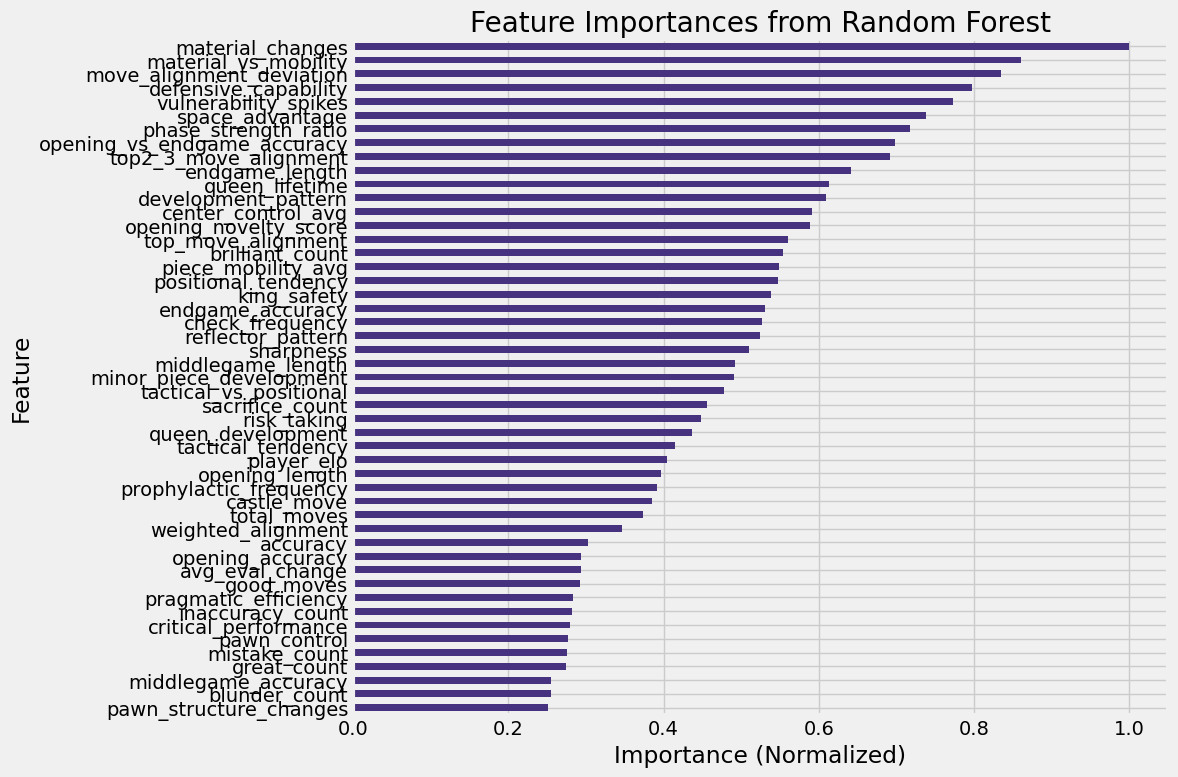

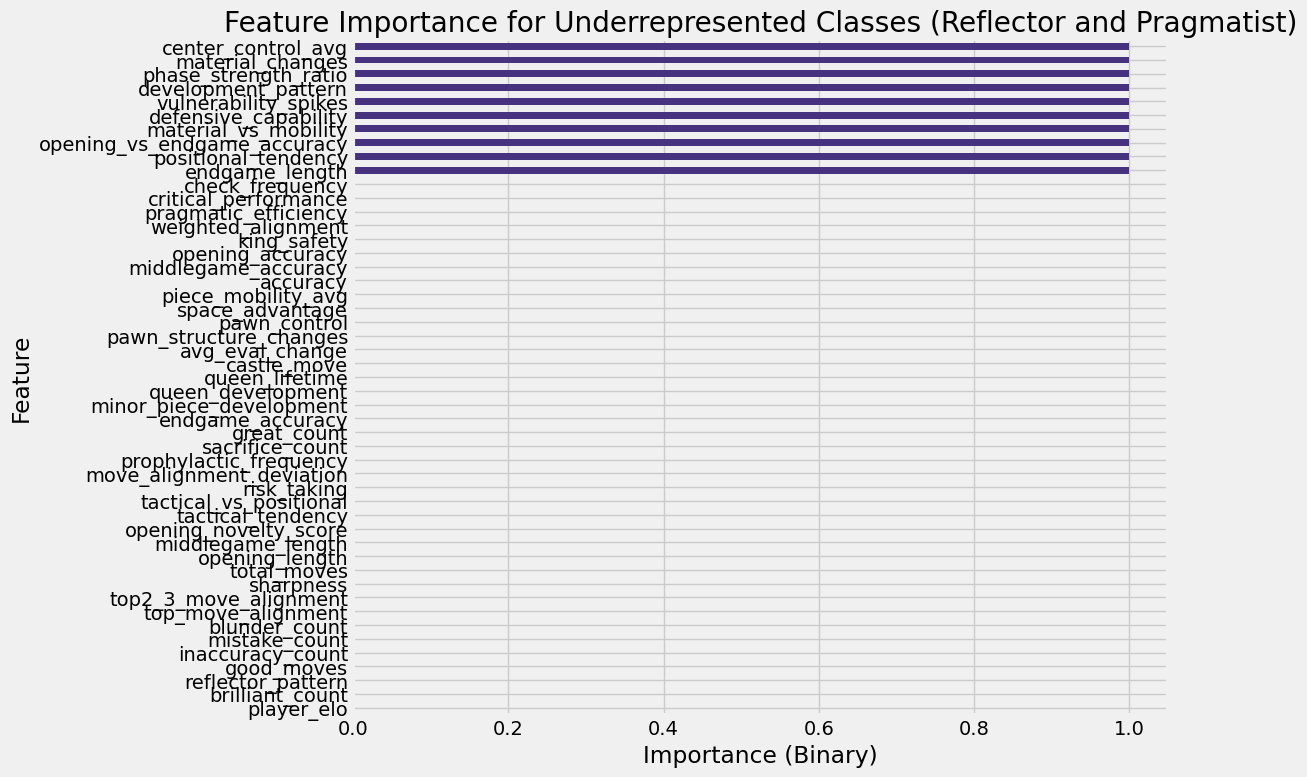

PCA explained variance ratios: [0.43031527 0.18089135 0.13245075]
Total variance explained: 74.37%

Top 5 features for each principal component:

PC1:
  endgame_accuracy: +0.345
  opening_vs_endgame_accuracy: -0.313
  phase_strength_ratio: -0.313
  endgame_length: +0.307
  queen_lifetime: -0.266

PC2:
  brilliant_count: +0.361
  space_advantage: +0.359
  top2_3_move_alignment: -0.321
  endgame_accuracy: -0.320
  endgame_length: -0.301

PC3:
  piece_mobility_avg: +0.504
  top_move_alignment: +0.359
  material_vs_mobility: -0.357
  move_alignment_deviation: -0.297
  positional_tendency: +0.282


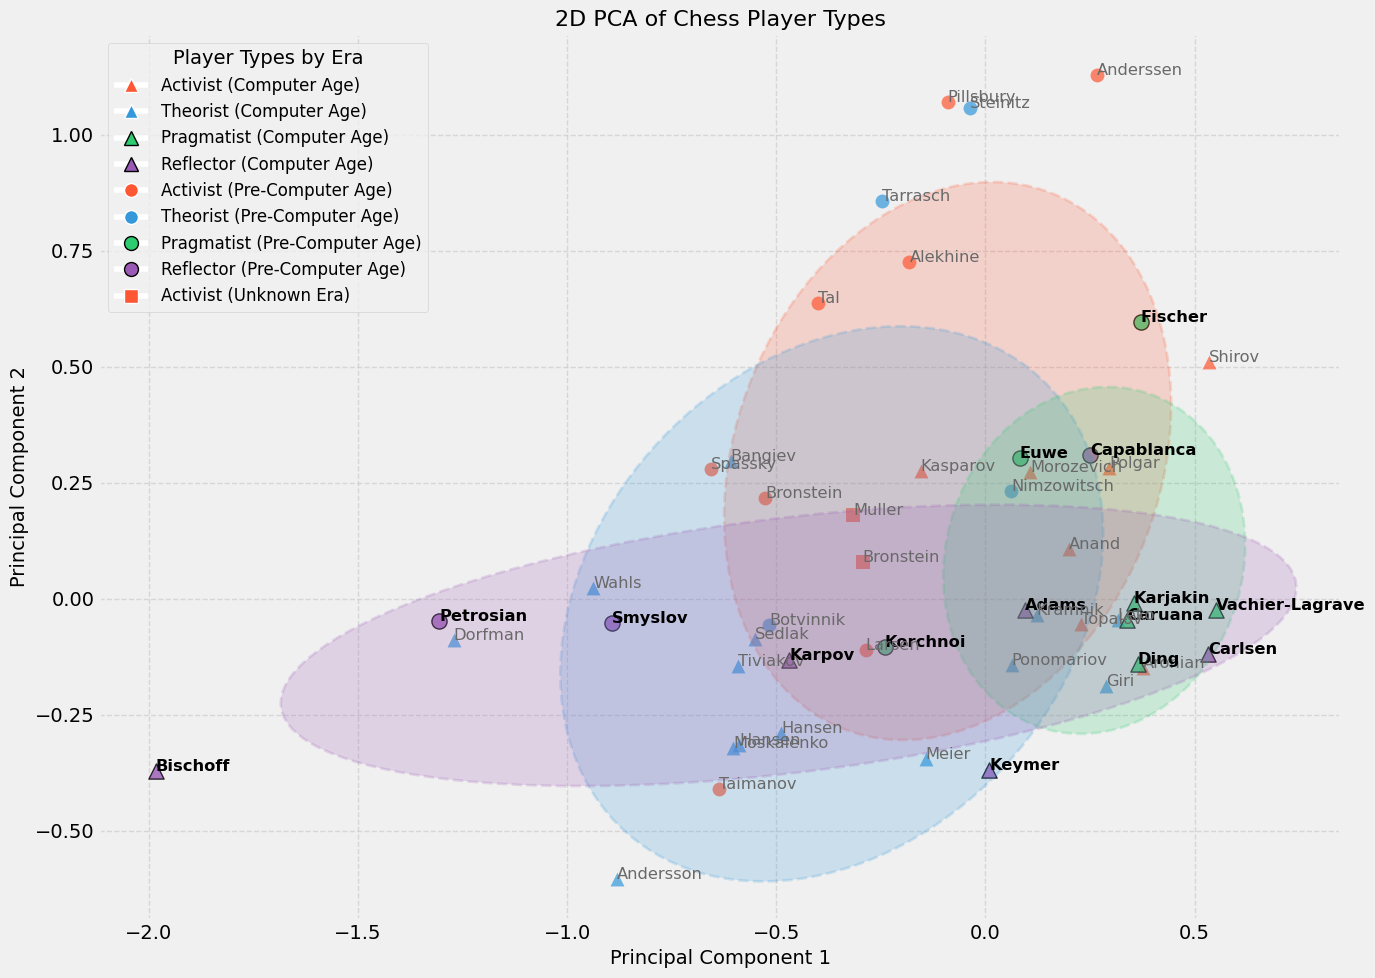


ENHANCED SUPERVISED LEARNING WITH CLASS BALANCING:
Training models on 50 labeled players
Class distribution: {'Theorist': 18, 'Activist': 17, 'Reflector': 8, 'Pragmatist': 7}

--------------------------------------------------
Training Random Forest with SMOTE resampling


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/samir/miniforge3/envs/chess/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/samir/miniforge3/envs/chess/lib/python3.12/site-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/samir/miniforge3/envs/chess/lib/python3.12/site-packages/imblearn/pipeline.py", line 518, in fit
    Xt, yt = self._fit(X, y, routed_params, raw_params=params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/samir/miniforge3/envs/chess/lib/python3.12/site-packages/imblearn/pipeline.py", line 400, in _fit
    self._validate_steps()
  File "/Users/samir/miniforge3/envs/chess/lib/python3.12/site-packages/imblearn/pipeline.py", line 289, in _validate_steps
    raise TypeError(
TypeError: All intermediate steps of the chain should not be Pipelines


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                   StratifiedKFold, LeaveOneOut, 
                                   RepeatedStratifiedKFold, GridSearchCV, 
                                   cross_validate, learning_curve)
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, classification_report, confusion_matrix,
                           roc_auc_score, balanced_accuracy_score, 
                           make_scorer)
from sklearn.semi_supervised import LabelSpreading, LabelPropagation
from sklearn.base import clone
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# -------------------------------
# Define Known Player Types by Era
# -------------------------------
activist_pre_computer = [
    "Alekhine", "Tal", "Spassky", "Pillsbury",
    "Anderssen", "Bronstein, David", "Larsen", "Taimanov"
]

activist_computer_age = [
    "Kasparov", "Anand", "Shirov", "Morozevich",
    "Topalov", "Aronian", "Polgar", "Müller"
]

theorist_pre_computer = [
    "Steinitz", "Botvinnik", "Tarrasch", "Nimzowitsch"
]

theorist_computer_age = [
    "Kramnik", "Leko", "Giri", "Meier", "Andersson",
    "Sedlak", "Tiviakov", "Ponomariov", "Wahls",
    "Moskalenko", "Dorfman", "Bangiev", "Hansen"
]

reflector_pre_computer = [
    "Capablanca", "Smyslov", "Petrosian"
]

reflector_computer_age = [
    "Karpov", "Carlsen", "Adams, Michael", "Keymer", "Bischoff"
]

pragmatist_pre_computer = [
    "Fischer", "Euwe", "Korchnoi"
]

pragmatist_computer_age = [
    "Caruana", "Ding", "Karjakin", "Vachier-Lagrave"
]

# -------------------------------
# Step 1. Aggregate Game-Level Data to Player Level
# -------------------------------
def aggregate_player_data(players_df, min_games=100):
    """
    Aggregate game-level data into a player-level DataFrame.
    Only players with at least `min_games` games are included.
    Averages are computed for numeric features.
    'None' player types are replaced with 'Unknown'.
    """
    # Identify players with enough games
    game_counts = players_df['player_name'].value_counts()
    players_with_enough_games = game_counts[game_counts >= min_games].index.tolist()
    print(f"Found {len(players_with_enough_games)} players with at least {min_games} games.")

    # Filter to these players
    filtered_df = players_df[players_df['player_name'].isin(players_with_enough_games)].copy()

    # Columns that we will ignore for numeric aggregation
    ignore_cols = ['player_name', 'player_color', 'opponent_name', 'game_id', 'result', 'player_type']
    numeric_cols = [col for col in filtered_df.columns
                    if col not in ignore_cols and pd.api.types.is_numeric_dtype(filtered_df[col])]

    aggregated_data = []

    for player in players_with_enough_games:
        player_games = filtered_df[filtered_df['player_name'] == player]
        # Get the first non-NaN player_type if available, default to 'Unknown'
        if 'player_type' in player_games.columns:
            p_type_series = player_games['player_type'].dropna()
            p_type = p_type_series.iloc[0] if not p_type_series.empty else 'Unknown'
        else:
            p_type = 'Unknown'

        player_stats = {
            'player_name': player,
            'player_type': p_type,
            'num_games': len(player_games)
        }
        # Compute averages for each numeric feature
        for col in numeric_cols:
            player_stats[col] = player_games[col].mean()
        aggregated_data.append(player_stats)

    agg_df = pd.DataFrame(aggregated_data)
    return agg_df

# -------------------------------
# Step 2. Categorize Players into Pre-Computer and Computer Age Eras
# -------------------------------
def categorize_players_by_era(agg_df):
    """
    Categorize players into "Pre-Computer Age" and "Computer Age" based on
    their presence in the known player lists.
    """
    # Add era column, default to 'Unknown Era'
    agg_df['era'] = 'Unknown Era'
    
    # For tracking assignment stats
    assigned_type_count = 0
    assigned_era_count = 0
    
    # Categorize players by type and era
    for idx, player in agg_df.iterrows():
        player_name = player['player_name']
        original_type = player['player_type']
        
        # Check all known player categories
        if any(name in player_name for name in activist_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Activist'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in activist_computer_age):
            agg_df.at[idx, 'player_type'] = 'Activist'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in theorist_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Theorist'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in theorist_computer_age):
            agg_df.at[idx, 'player_type'] = 'Theorist'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in reflector_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Reflector'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in reflector_computer_age):
            agg_df.at[idx, 'player_type'] = 'Reflector'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in pragmatist_pre_computer):
            agg_df.at[idx, 'player_type'] = 'Pragmatist'
            agg_df.at[idx, 'era'] = 'Pre-Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        elif any(name in player_name for name in pragmatist_computer_age):
            agg_df.at[idx, 'player_type'] = 'Pragmatist'
            agg_df.at[idx, 'era'] = 'Computer Age'
            if original_type == 'Unknown':
                assigned_type_count += 1
            assigned_era_count += 1
            
        else:
            # Try to extract birth/death years from player names if we didn't match a known player
            import re
            birth_year = None
            
            # Look for years in parentheses in the player name
            year_pattern = r'\((\d{4})[-–](\d{4}|\?{4}|\d{0})\)'
            match = re.search(year_pattern, player_name)
            
            if match:
                # Found birth-death years pattern
                birth_year = int(match.group(1))
                
                # Assume a player's prime playing years are ~20-30 years after birth
                prime_playing_year = birth_year + 30
                if prime_playing_year < 1990:  # 1990 as computer age threshold
                    agg_df.at[idx, 'era'] = 'Pre-Computer Age'
                    assigned_era_count += 1
                else:
                    agg_df.at[idx, 'era'] = 'Computer Age'
                    assigned_era_count += 1
    
    # Summary of the categorization
    print(f"\nAssigned player types for {assigned_type_count} players from provided lists")
    print(f"Assigned eras for {assigned_era_count} players")
    
    era_counts = agg_df['era'].value_counts()
    print("\nPlayer Era Categorization:")
    for era, count in era_counts.items():
        print(f"  {era}: {count} players")
    
    # Count player types in each era
    print("\nPlayer Types Distribution:")
    for era in agg_df['era'].unique():
        era_df = agg_df[agg_df['era'] == era]
        print(f"\nPlayer Types in {era}:")
        type_counts = era_df['player_type'].value_counts()
        for player_type, count in type_counts.items():
            print(f"  {player_type}: {count} players")
    
    return agg_df

# -------------------------------
# Step 3. Create Derived Features to Better Distinguish Player Types
# -------------------------------
def create_derived_features(agg_df):
    """
    Create new derived features that might better distinguish player types.
    """
    print("\nCreating derived features to enhance classification...")
    
    # 1. Tactical vs Positional Balance
    # Combine tactical features (sacrifice_count, check_frequency) vs positional ones (space_advantage, center_control_avg)
    if all(col in agg_df.columns for col in ['sacrifice_count', 'check_frequency', 'space_advantage', 'center_control_avg']):
        agg_df['tactical_tendency'] = agg_df['sacrifice_count'] + agg_df['check_frequency']
        agg_df['positional_tendency'] = agg_df['space_advantage'] + agg_df['center_control_avg'] 
        agg_df['tactical_vs_positional'] = agg_df['tactical_tendency'] / agg_df['positional_tendency'].replace(0, 0.001)
        print("- Added tactical_vs_positional ratio")
    
    # 2. Opening vs Endgame Focus
    if all(col in agg_df.columns for col in ['opening_accuracy', 'endgame_accuracy']):
        agg_df['opening_vs_endgame_accuracy'] = agg_df['opening_accuracy'] / agg_df['endgame_accuracy'].replace(0, 0.001)
        print("- Added opening_vs_endgame_accuracy ratio")
    
    # 3. Material vs Activity Balance
    if all(col in agg_df.columns for col in ['material_changes', 'piece_mobility_avg']):
        agg_df['material_vs_mobility'] = agg_df['material_changes'] / agg_df['piece_mobility_avg'].replace(0, 0.001)
        print("- Added material_vs_mobility ratio")
    
    # 4. Risk-Taking Metric
    if all(col in agg_df.columns for col in ['blunder_count', 'brilliant_count', 'sacrifice_count']):
        agg_df['risk_taking'] = (agg_df['brilliant_count'] + agg_df['sacrifice_count']) / (agg_df['blunder_count'] + 1)
        print("- Added risk_taking metric")
    
    # 5. Defensive Capability
    if all(col in agg_df.columns for col in ['king_safety', 'prophylactic_frequency']):
        agg_df['defensive_capability'] = agg_df['king_safety'] * agg_df['prophylactic_frequency']
        print("- Added defensive_capability metric")
    
    # 6. Move Alignment Deviation - how much a player deviates from engine suggestions
    if all(col in agg_df.columns for col in ['top_move_alignment', 'top2_3_move_alignment']):
        agg_df['move_alignment_deviation'] = agg_df['top2_3_move_alignment'] - agg_df['top_move_alignment']
        print("- Added move_alignment_deviation")
    
    # 7. Piece Development Patterns
    if all(col in agg_df.columns for col in ['minor_piece_development', 'queen_development']):
        agg_df['development_pattern'] = agg_df['minor_piece_development'] / agg_df['queen_development'].replace(0, 0.001)
        print("- Added development_pattern")
    
    # 8. Game Phase Strength Ratio
    phases = []
    if 'opening_accuracy' in agg_df.columns:
        phases.append('opening_accuracy')
    if 'middlegame_accuracy' in agg_df.columns:
        phases.append('middlegame_accuracy')
    if 'endgame_accuracy' in agg_df.columns:
        phases.append('endgame_accuracy')
    
    if len(phases) >= 2:
        agg_df['phase_strength_ratio'] = agg_df[phases].max(axis=1) / agg_df[phases].min(axis=1).replace(0, 0.001)
        print("- Added phase_strength_ratio")
    
    # 9. Reflector-Specific Feature: Prophylactic-to-Aggressive Ratio
    if all(col in agg_df.columns for col in ['prophylactic_frequency', 'check_frequency', 'sacrifice_count']):
        agg_df['reflector_pattern'] = agg_df['prophylactic_frequency'] / (agg_df['check_frequency'] + agg_df['sacrifice_count'] + 0.001)
        print("- Added reflector_pattern")
    
    # 10. Pragmatist-Specific Feature: Critical Performance to Accuracy Ratio
    if all(col in agg_df.columns for col in ['critical_performance', 'accuracy']):
        agg_df['pragmatic_efficiency'] = agg_df['critical_performance'] / agg_df['accuracy'].replace(0, 0.001)
        print("- Added pragmatic_efficiency")
    
    # Count how many new features were added
    original_cols = set(agg_df.columns)
    derived_cols = [col for col in agg_df.columns if col not in original_cols]
    print(f"\nTotal {len(derived_cols)} derived features added.")
    
    return agg_df

# -------------------------------
# Step 4. Select Best Features using Feature Importance and Statistical Tests
# -------------------------------
def select_best_features(agg_df, n_features=15, importance_threshold=0.1):
    """
    Enhanced feature selection using RandomForest importance and statistical tests.
    Focuses on features that can distinguish all player types, with special 
    attention to underrepresented classes.
    """
    from scipy.stats import f_oneway
    
    # Filter to labeled data only
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    metadata = ['player_name', 'player_type', 'num_games', 'era']
    numeric_cols = [col for col in labeled_df.columns if col not in metadata and pd.api.types.is_numeric_dtype(labeled_df[col])]

    X = labeled_df[numeric_cols]
    y = labeled_df['player_type']

    # Encode player_type as numeric
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    # Impute and scale
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_imputed = imputer.fit_transform(X)
    X_scaled = scaler.fit_transform(X_imputed)

    # Train RandomForest classifier with balanced class weights
    rf = RandomForestClassifier(n_estimators=1500, class_weight='balanced', random_state=42)
    rf.fit(X_scaled, y_encoded)

    importances = rf.feature_importances_
    importance_series = pd.Series(importances, index=numeric_cols)

    # Normalize importances to the maximum value
    importance_series = importance_series / importance_series.max()
    
    # 1. Get features above the importance threshold from Random Forest
    rf_selected = importance_series[importance_series > importance_threshold].index.tolist()
    
    # 2. Perform ANOVA test for each feature
    anova_results = {}
    for feature in numeric_cols:
        # Group by player type
        groups = [labeled_df[labeled_df['player_type'] == pt][feature].dropna() for pt in labeled_df['player_type'].unique()]
        
        # Skip if any group has too few samples
        if any(len(group) < 2 for group in groups):
            continue
            
        # Calculate ANOVA p-value
        try:
            f_stat, p_value = f_oneway(*groups)
            anova_results[feature] = p_value
        except:
            continue
    
    # Select features with significant p-values
    sig_threshold = 0.1  # Higher threshold to include more potentially relevant features
    anova_selected = [feature for feature, p_value in anova_results.items() if p_value < sig_threshold]
    
    # 3. Specifically check for features that help identify Reflectors and Pragmatists
    underrep_features = []
    
    for player_type in ['Reflector', 'Pragmatist']:
        # Create binary target: this type vs rest
        binary_target = (labeled_df['player_type'] == player_type).astype(int)
        
        # Train a small Random Forest for this specific type
        rf_binary = RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=42)
        rf_binary.fit(X_scaled, binary_target)
        
        # Get top 5 features for this type
        binary_importances = pd.Series(rf_binary.feature_importances_, index=numeric_cols)
        top_features = binary_importances.nlargest(5).index.tolist()
        
        underrep_features.extend(top_features)
    
    # Combine all feature selection approaches, prioritizing features that help with underrepresented classes
    final_selected = list(set(rf_selected + anova_selected + underrep_features))
    
    # If still more than desired n_features, choose based on combined importance
    if len(final_selected) > n_features:
        # Create a combined score
        combined_score = pd.Series(0.0, index=numeric_cols)
        
        # Add RF importance (normalized)
        combined_score += importance_series
        
        # Add ANOVA significance (inverted and normalized)
        if anova_results:
            anova_series = pd.Series(anova_results)
            anova_series = 1 - (anova_series / anova_series.max())
            combined_score[anova_series.index] += anova_series
        
        # Add binary classification importance for underrepresented classes
        for feature in underrep_features:
            combined_score[feature] += 1.0
            
        # Select top n_features based on combined score
        final_selected = combined_score.sort_values(ascending=False).index[:n_features].tolist()

    print("\nEnhanced feature selection results:")
    print(f"- Random Forest selected: {len(rf_selected)} features")
    print(f"- ANOVA test selected: {len(anova_selected)} features")
    print(f"- Underrepresented classes selection: {len(underrep_features)} features")
    print(f"- Final combined selection: {len(final_selected)} features")

    print("\nSelected features:", final_selected)

    # Visualize feature importances
    plt.figure(figsize=(12, 8))
    importance_series.sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importances from Random Forest')
    plt.xlabel('Importance (Normalized)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
    
    # Visualize feature importance specifically for underrepresented classes
    underrep_importances = pd.Series(0.0, index=numeric_cols)
    for feature in underrep_features:
        underrep_importances[feature] += 1.0
    
    plt.figure(figsize=(12, 8))
    underrep_importances.sort_values(ascending=True).plot(kind='barh')
    plt.title('Feature Importance for Underrepresented Classes (Reflector and Pragmatist)')
    plt.xlabel('Importance (Binary)')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

    return final_selected

# -------------------------------
# Step 5. Apply PCA to Selected Features
# -------------------------------
def apply_pca(agg_df, features, n_components=3):
    """
    Scale the selected features, apply PCA and return the transformed data.
    """
    X = agg_df[features]
    
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()

    X_imputed = imputer.fit_transform(X)
    X_scaled = scaler.fit_transform(X_imputed)

    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_scaled)

    print(f"PCA explained variance ratios: {pca.explained_variance_ratio_}")
    print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")
    
    # Get feature loadings (correlations between features and principal components)
    loadings = pd.DataFrame(
        pca.components_.T, 
        columns=[f'PC{i+1}' for i in range(n_components)],
        index=features
    )
    
    # Show top 5 features for each principal component
    print("\nTop 5 features for each principal component:")
    for i in range(n_components):
        pc = f'PC{i+1}'
        print(f"\n{pc}:")
        top_features = loadings[pc].abs().sort_values(ascending=False).head(5)
        for feature, loading in top_features.items():
            sign = "+" if loadings.loc[feature, pc] > 0 else "-"
            print(f"  {feature}: {sign}{abs(loading):.3f}")
    
    return X_pca, pca

# -------------------------------
# Step 6. Visualize PCA Results
# -------------------------------
def visualize_pca(agg_df, X_pca, plot_type='2d'):
    """
    Visualize PCA results with improved aesthetics and interactive options.
    """
    # Create a dataframe with PCA data
    if X_pca.shape[1] >= 3:
        pca_df = pd.DataFrame({
            'PC1': X_pca[:, 0],
            'PC2': X_pca[:, 1],
            'PC3': X_pca[:, 2],
            'player_type': agg_df['player_type'],
            'player_name': agg_df['player_name'],
            'era': agg_df['era'],
            'num_games': agg_df['num_games']
        })
    else:
        pca_df = pd.DataFrame({
            'PC1': X_pca[:, 0],
            'PC2': X_pca[:, 1],
            'PC3': np.zeros(X_pca.shape[0]),  # Placeholder if only 2 components
            'player_type': agg_df['player_type'],
            'player_name': agg_df['player_name'],
            'era': agg_df['era'],
            'num_games': agg_df['num_games']
        })

    # Define color palette for player types
    palette = {
        'Activist': '#FF5733',  # Bright red/orange
        'Theorist': '#3498DB',  # Blue
        'Pragmatist': '#2ECC71',  # Green
        'Reflector': '#9B59B6',  # Purple
        'Unknown': '#95A5A6'    # Gray
    }
    
    # Define markers for eras
    markers = {'Pre-Computer Age': 'o', 'Computer Age': '^', 'Unknown Era': 's'}
    
    if plot_type == '2d' or plot_type == 'both':
        # Create combined 2D visualization
        plt.figure(figsize=(14, 10))
        
        # Create a custom legend elements list
        from matplotlib.lines import Line2D
        legend_elements = []
        
        # Plot each era and player type combination separately
        for era in pca_df['era'].unique():
            for p_type in palette.keys():
                # Skip Unknown type for cleaner visualization
                if p_type == 'Unknown' and plot_type != 'unknown':
                    continue
                    
                # Get the subset of data for this era and player type
                subset = pca_df[(pca_df['era'] == era) & (pca_df['player_type'] == p_type)]
                if not subset.empty:
                    plt.scatter(subset['PC1'], subset['PC2'], 
                               color=palette[p_type], 
                               marker=markers[era],
                               s=120 if p_type in ['Reflector', 'Pragmatist'] else 100,  # Bigger markers for underrepresented
                               alpha=0.8 if p_type in ['Reflector', 'Pragmatist'] else 0.7,  # More visible
                               edgecolors='black' if p_type in ['Reflector', 'Pragmatist'] else None,  # Outline
                               linewidth=1 if p_type in ['Reflector', 'Pragmatist'] else 0,
                               label=f"{p_type} ({era})")
                    
                    # Add this combination to the legend
                    legend_elements.append(
                        Line2D([0], [0], marker=markers[era], color='w', 
                              markerfacecolor=palette[p_type], 
                              markeredgecolor='black' if p_type in ['Reflector', 'Pragmatist'] else None,
                              markersize=10, 
                              label=f"{p_type} ({era})")
                    )
        
        # Add player name labels
        for i, row in pca_df.iterrows():
            # Skip labeling Unknown players for clarity
            if row['player_type'] == 'Unknown' and plot_type != 'unknown':
                continue
                
            player_name = row['player_name']
            if ', ' in player_name:
                last_name = player_name.split(', ')[0]
                plt.text(row['PC1'], row['PC2'], last_name, 
                       horizontalalignment='left', size='small', 
                       color='black' if row['player_type'] in ['Reflector', 'Pragmatist'] else 'dimgrey',
                       fontweight='bold' if row['player_type'] in ['Reflector', 'Pragmatist'] else 'normal')
            else:
                plt.text(row['PC1'], row['PC2'], player_name, 
                       horizontalalignment='left', size='small', 
                       color='black' if row['player_type'] in ['Reflector', 'Pragmatist'] else 'dimgrey',
                       fontweight='bold' if row['player_type'] in ['Reflector', 'Pragmatist'] else 'normal')
        
        # Draw ellipses around each class
        from matplotlib.patches import Ellipse
        import matplotlib.transforms as transforms
        
        def confidence_ellipse(x, y, ax, n_std=2.0, facecolor='none', **kwargs):
            """
            Create a plot of the covariance confidence ellipse of `x` and `y`
            """
            if x.size != y.size:
                raise ValueError("x and y must be the same size")
                
            cov = np.cov(x, y)
            pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
            
            # Using a special case to obtain the eigenvalues of this
            # two-dimensional dataset.
            ell_radius_x = np.sqrt(1 + pearson)
            ell_radius_y = np.sqrt(1 - pearson)
            ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                              facecolor=facecolor, **kwargs)
            
            # Compute mean of x and y
            mean_x = np.mean(x)
            mean_y = np.mean(y)
            
            # Calculating the standard deviation of x and y
            scale_x = np.std(x) * n_std
            scale_y = np.std(y) * n_std
            
            # Apply transformations
            transf = transforms.Affine2D() \
                .rotate_deg(45) \
                .scale(scale_x, scale_y) \
                .translate(mean_x, mean_y)
                
            ellipse.set_transform(transf + ax.transData)
            return ax.add_patch(ellipse)
        
        # Add ellipses for each player type (if enough points)
        ax = plt.gca()
        for p_type in [pt for pt in palette.keys() if pt != 'Unknown']:
            type_data = pca_df[pca_df['player_type'] == p_type]
            if len(type_data) >= 3:  # Need at least 3 points for covariance
                confidence_ellipse(
                    type_data['PC1'], type_data['PC2'], ax, n_std=1.5,
                    edgecolor=palette[p_type], alpha=0.2, linewidth=2,
                    facecolor=palette[p_type], linestyle='--'
                )
        
        # Add titles and labels
        plt.title('2D PCA of Chess Player Types', fontsize=16)
        plt.xlabel('Principal Component 1', fontsize=14)
        plt.ylabel('Principal Component 2', fontsize=14)
        plt.legend(handles=legend_elements, loc='best', title="Player Types by Era", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    
    if plot_type == '3d' or plot_type == 'both':
        if X_pca.shape[1] >= 3:
            # Create 3D interactive visualization
            fig = px.scatter_3d(
                pca_df,
                x='PC1', y='PC2', z='PC3',
                color='player_type',
                symbol='era',
                size=np.where(pca_df['player_type'].isin(['Reflector', 'Pragmatist']), 15, 10),
                hover_data=['player_name', 'num_games', 'era'],
                color_discrete_map=palette,
                title='3D PCA of Chess Player Types',
                labels={'PC1': 'Principal Component 1', 
                        'PC2': 'Principal Component 2', 
                        'PC3': 'Principal Component 3'},
                height=800
            )
            
            # Enhance the visualization
            fig.update_traces(
                marker=dict(
                    opacity=0.8,
                    line=dict(width=1, color='DarkSlateGrey')
                )
            )
            
            # Add text labels to points
            fig.update_traces(
                text=pca_df['player_name'],
                hovertemplate='<b>%{text}</b><br>Type: %{marker.color}<br>Era: %{marker.symbol}<br>Games: %{customdata[1]}'
            )
            
            # Improve layout
            fig.update_layout(
                scene=dict(
                    xaxis_title='Principal Component 1',
                    yaxis_title='Principal Component 2',
                    zaxis_title='Principal Component 3'
                ),
                legend_title="Player Types",
                title_font=dict(size=20)
            )
            
            fig.show()
    
    return pca_df

# -------------------------------
# Step 7. Enhanced Supervised Learning with Class Balancing
# -------------------------------
def train_balanced_models(agg_df, selected_features):
    """
    Train multiple classifier models with advanced class balancing techniques.
    Special focus on improving classification of minority classes.
    """
    # Filter to only players with known types (not 'Unknown')
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    print(f"Training models on {len(labeled_df)} labeled players")
    print(f"Class distribution: {labeled_df['player_type'].value_counts().to_dict()}")
    
    # Use only available selected features
    features_to_use = [f for f in selected_features if f in labeled_df.columns]
    
    X = labeled_df[features_to_use]
    y = labeled_df['player_type']
    
    # Create preprocessing pipeline
    from sklearn.pipeline import Pipeline
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    # Create SMOTE pipeline to handle class imbalance
    smote_pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
    ])
    
    # Define models to test (with optimized hyperparameters)
    models = {
        'Random Forest': RandomForestClassifier(
            n_estimators=500, 
            max_depth=None,
            min_samples_split=2,
            min_samples_leaf=1,
            class_weight='balanced',
            random_state=42
        ),
        'SVM': SVC(
            C=10.0,
            gamma='scale',
            class_weight='balanced',
            probability=True,
            random_state=42
        ),
        'Gradient Boosting': GradientBoostingClassifier(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=3,
            random_state=42
        ),
        'KNN': KNeighborsClassifier(
            n_neighbors=5,
            weights='distance'
        ),
        'Logistic Regression': LogisticRegression(
            C=1.0,
            solver='lbfgs',
            multi_class='multinomial',
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        )
    }
    
    # Define performance metrics
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'balanced_accuracy': make_scorer(balanced_accuracy_score),
        'precision_macro': make_scorer(precision_score, average='macro'),
        'recall_macro': make_scorer(recall_score, average='macro'),
        'f1_macro': make_scorer(f1_score, average='macro')
    }
    
    # Set up stratified cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Store results for model comparison
    model_results = {}
    
    for model_name, model in models.items():
        print(f"\n{'-'*50}")
        print(f"Training {model_name} with SMOTE resampling")
        
        # Full pipeline with SMOTE and the classifier
        full_pipeline = ImbPipeline([
            ('smote_pipe', smote_pipeline),
            ('classifier', model)
        ])
        
        # Train and evaluate with cross-validation
        cv_results = cross_validate(
            full_pipeline, X, y, 
            cv=cv,
            scoring=scoring,
            return_train_score=True,
            return_estimator=True  # Save fitted estimators
        )
        
        # Extract and print results
        test_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring.keys()}
        test_stds = {metric: np.std(cv_results[f'test_{metric}']) for metric in scoring.keys()}
        
        print(f"\n{model_name} Cross-Validation Results:")
        for metric, score in test_scores.items():
            std = test_stds[metric]
            print(f"  {metric}: {score:.4f} (±{std:.4f})")
        
        # Per-class metrics for the best estimator
        best_idx = np.argmax(cv_results['test_balanced_accuracy'])
        best_estimator = cv_results['estimator'][best_idx]
        
        # Get class predictions for the validation fold
        train_idx, test_idx = list(cv.split(X, y))[best_idx]
        X_test_fold = X.iloc[test_idx]
        y_test_fold = y.iloc[test_idx]
        
        # Transform test data
        X_test_preprocessed = preprocessor.fit_transform(X_test_fold)
        
        # Direct prediction with the classifier
        class_predictions = best_estimator.named_steps['classifier'].predict(X_test_preprocessed)
        
        # Calculate metrics for each class
        print("\nPer-Class Performance:")
        for player_type in np.unique(y):
            class_precision = precision_score(
                y_test_fold == player_type, 
                class_predictions == player_type,
                zero_division=0
            )
            class_recall = recall_score(
                y_test_fold == player_type, 
                class_predictions == player_type,
                zero_division=0
            )
            class_f1 = f1_score(
                y_test_fold == player_type, 
                class_predictions == player_type,
                zero_division=0
            )
            
            n_samples = sum(y_test_fold == player_type)
            print(f"  {player_type} (n={n_samples}):")
            print(f"    Precision: {class_precision:.4f}")
            print(f"    Recall: {class_recall:.4f}")
            print(f"    F1 Score: {class_f1:.4f}")
        
        # Store results for later comparison
        model_results[model_name] = {
            'cv_results': cv_results,
            'test_scores': test_scores,
            'best_estimator': best_estimator
        }
    
    # Identify the best model based on balanced accuracy
    best_model_name = max(
        model_results.keys(), 
        key=lambda name: model_results[name]['test_scores']['balanced_accuracy']
    )
    best_model = model_results[best_model_name]['best_estimator']
    
    print(f"\n{'-'*50}")
    print(f"Best model: {best_model_name} with balanced accuracy {model_results[best_model_name]['test_scores']['balanced_accuracy']:.4f}")
    
    # Train the best model on all labeled data
    X_processed = preprocessor.fit_transform(X)
    X_resampled, y_resampled = SMOTE(random_state=42).fit_resample(X_processed, y)
    best_model.named_steps['classifier'].fit(X_resampled, y_resampled)
    
    # Return the best model and its results
    return model_results, best_model, features_to_use

# -------------------------------
# Step 8. Create Advanced Ensemble Model
# -------------------------------
def build_ensemble_model(agg_df, model_results, features_to_use):
    """
    Create optimized ensemble models with custom weights for minority classes.
    """
    # Filter to only players with known types (not 'Unknown')
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    X = labeled_df[features_to_use]
    y = labeled_df['player_type']
    
    # Preprocess the data
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    X_processed = preprocessor.fit_transform(X)
    
    # Apply SMOTE to balance classes
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_processed, y)
    
    print(f"\nBuilding ensemble models:")
    print(f"Original class distribution: {Counter(y)}")
    print(f"Resampled class distribution: {Counter(y_resampled)}")
    
    # Extract best estimators from model_results
    base_estimators = []
    for model_name, results in model_results.items():
        # Skip SVM for voting ensemble (slower and less compatible)
        if model_name == 'SVM':
            continue
            
        estimator = results['best_estimator'].named_steps['classifier']
        base_estimators.append((model_name, estimator))
    
    # Build voting classifier
    voting_weights = None  # Equal weights initially
    voting_clf = VotingClassifier(
        estimators=base_estimators,
        voting='soft',
        weights=voting_weights
    )
    
    # Build stacking classifier
    stacking_clf = StackingClassifier(
        estimators=base_estimators,
        final_estimator=LogisticRegression(
            class_weight='balanced',
            max_iter=1000,
            random_state=42
        ),
        cv=5
    )
    
    # Train models
    print("\nTraining Voting Classifier...")
    voting_clf.fit(X_resampled, y_resampled)
    
    print("Training Stacking Classifier...")
    stacking_clf.fit(X_resampled, y_resampled)
    
    # Evaluate with cross-validation
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'balanced_accuracy': make_scorer(balanced_accuracy_score),
        'f1_macro': make_scorer(f1_score, average='macro')
    }
    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    ensemble_results = {}
    ensemble_models = {
        'Voting Classifier': voting_clf,
        'Stacking Classifier': stacking_clf
    }
    
    for name, model in ensemble_models.items():
        # Apply cross-validation
        cv_scores = cross_validate(
            model, X_processed, y,  # Use original data to evaluate
            cv=cv,
            scoring=scoring
        )
        
        # Extract scores
        mean_scores = {metric: np.mean(cv_scores[f'test_{metric}']) for metric in scoring.keys()}
        std_scores = {metric: np.std(cv_scores[f'test_{metric}']) for metric in scoring.keys()}
        
        # Print results
        print(f"\n{name} Cross-Validation Results:")
        for metric, score in mean_scores.items():
            std = std_scores[metric]
            print(f"  {metric}: {score:.4f} (±{std:.4f})")
        
        ensemble_results[name] = {
            'cv_scores': cv_scores,
            'mean_scores': mean_scores,
            'std_scores': std_scores
        }
    
    # Identify best ensemble
    best_ensemble_name = max(
        ensemble_results.keys(),
        key=lambda name: ensemble_results[name]['mean_scores']['balanced_accuracy']
    )
    
    best_ensemble = ensemble_models[best_ensemble_name]
    
    print(f"\nBest ensemble model: {best_ensemble_name}")
    
    return ensemble_models, ensemble_results, best_ensemble, preprocessor, smote

# -------------------------------
# Step 9. Enhanced Semi-Supervised Learning
# -------------------------------
def train_advanced_semisupervised(agg_df, selected_features, best_model, preprocessor, smote):
    """
    Improved semi-supervised learning with robust error handling and stronger
    classifier initialization.
    """
    # Prepare data including unlabeled samples
    features_to_use = [f for f in selected_features if f in agg_df.columns]
    
    X = agg_df[features_to_use]
    y = agg_df['player_type'].copy()
    
    # Preprocess all data
    X_processed = preprocessor.transform(X)
    
    # Create a mask for labeled data
    labeled_mask = (y != 'Unknown')
    labeled_count = sum(labeled_mask)
    unlabeled_count = sum(~labeled_mask)
    
    print(f"\nApplying advanced semi-supervised learning:")
    print(f"- Labeled players: {labeled_count}")
    print(f"- Unlabeled players: {unlabeled_count}")
    
    # First encode all known labels
    le = LabelEncoder()
    known_labels = y[labeled_mask].values
    le.fit(known_labels)
    
    # Create array of encoded labels with -1 for unknown
    y_encoded = np.ones(len(y), dtype=np.int32) * -1
    y_encoded[labeled_mask] = le.transform(y[labeled_mask].values)
    
    try:
        # Try multiple semi-supervised approaches
        methods = []
        
        # 1. Label Propagation
        print("\nTrying Label Propagation...")
        lp = LabelPropagation(
            kernel='knn',
            n_neighbors=min(7, np.sum(labeled_mask)-1),
            max_iter=1000,
            tol=1e-3,
            gamma=20
        )
        try:
            lp.fit(X_processed, y_encoded)
            lp_predictions = lp.predict(X_processed)
            lp_accuracy = accuracy_score(
                y_encoded[labeled_mask], 
                lp_predictions[labeled_mask]
            )
            print(f"  - Label Propagation accuracy on labeled data: {lp_accuracy:.4f}")
            methods.append(('Label Propagation', lp, lp_predictions, lp_accuracy))
        except Exception as e:
            print(f"  - Label Propagation error: {e}")
        
        # 2. Label Spreading
        print("\nTrying Label Spreading...")
        ls = LabelSpreading(
            kernel='knn',
            n_neighbors=min(7, np.sum(labeled_mask)-1),
            alpha=0.2,
            max_iter=1000
        )
        try:
            ls.fit(X_processed, y_encoded)
            ls_predictions = ls.predict(X_processed)
            ls_accuracy = accuracy_score(
                y_encoded[labeled_mask], 
                ls_predictions[labeled_mask]
            )
            print(f"  - Label Spreading accuracy on labeled data: {ls_accuracy:.4f}")
            methods.append(('Label Spreading', ls, ls_predictions, ls_accuracy))
        except Exception as e:
            print(f"  - Label Spreading error: {e}")
        
        # 3. Self-training using the best model
        print("\nTrying Self-training with best model...")
        
        # Extract the classifier from the best model (if it's a pipeline)
        if hasattr(best_model, 'named_steps') and 'classifier' in best_model.named_steps:
            classifier = best_model.named_steps['classifier']
        else:
            classifier = best_model
            
        # Clone to avoid modifying the original
        clf = clone(classifier)
        
        # Train on labeled data
        X_labeled = X_processed[labeled_mask]
        y_labeled = y_encoded[labeled_mask]
        
        # Apply SMOTE to balance the training data
        X_resampled, y_resampled = smote.fit_resample(X_labeled, y_labeled)
        
        # Train classifier
        clf.fit(X_resampled, y_resampled)
        
        # Predict on all data
        st_predictions = np.ones(len(y), dtype=np.int32) * -1
        st_predictions[labeled_mask] = y_encoded[labeled_mask]  # Keep original labels
        
        # Predict only for unlabeled data
        unlabeled_idx = np.where(~labeled_mask)[0]
        if len(unlabeled_idx) > 0:
            st_predictions[unlabeled_idx] = clf.predict(X_processed[unlabeled_idx])
        
        # Evaluate on labeled data (should be perfect since we kept original labels)
        st_accuracy = accuracy_score(
            y_encoded[labeled_mask], 
            st_predictions[labeled_mask]
        )
        print(f"  - Self-training accuracy on labeled data: {st_accuracy:.4f}")
        methods.append(('Self-training', clf, st_predictions, st_accuracy))
        
        # Choose the best method based on labeled data accuracy
        if methods:
            best_method = max(methods, key=lambda x: x[3])
            method_name, method_model, predictions, accuracy = best_method
            
            print(f"\nBest semi-supervised method: {method_name} with accuracy {accuracy:.4f}")
            
            # Convert numeric predictions back to labels
            final_predictions = np.array(['Unknown'] * len(predictions), dtype=object)
            valid_idx = (predictions != -1)
            final_predictions[valid_idx] = le.inverse_transform(predictions[valid_idx])
            
            # Create result dataframe
            result_df = agg_df.copy()
            result_df['predicted_player_type'] = final_predictions
            
            # Count newly labeled players
            newly_labeled = sum((result_df['player_type'] == 'Unknown') & 
                               (result_df['predicted_player_type'] != 'Unknown'))
            print(f"Newly labeled players: {newly_labeled}")
            
            # Show distribution of predicted types
            predicted_counts = pd.Series(
                final_predictions[~labeled_mask]
            ).value_counts()
            
            print("\nPredicted player types for unlabeled data:")
            for ptype, count in predicted_counts.items():
                print(f"  {ptype}: {count} players")
            
            # Per-class metrics for labeled data
            print("\nPer-class metrics on labeled data:")
            for player_type in le.classes_:
                class_mask = (y.iloc[labeled_mask] == player_type)
                
                if sum(class_mask) == 0:
                    continue
                    
                player_idx = np.where(labeled_mask)[0][class_mask]
                
                class_acc = accuracy_score(
                    [player_type] * len(player_idx), 
                    final_predictions[player_idx]
                )
                
                y_true_binary = (y.iloc[labeled_mask] == player_type)
                y_pred_binary = (final_predictions[labeled_mask] == player_type)
                
                class_prec = precision_score(y_true_binary, y_pred_binary, zero_division=0)
                class_rec = recall_score(y_true_binary, y_pred_binary, zero_division=0)
                class_f1 = f1_score(y_true_binary, y_pred_binary, zero_division=0)
                
                print(f"  {player_type}:")
                print(f"    Accuracy:  {class_acc:.4f}")
                print(f"    Precision: {class_prec:.4f}")
                print(f"    Recall:    {class_rec:.4f}")
                print(f"    F1 Score:  {class_f1:.4f}")
            
            return result_df, method_model, method_name
        else:
            raise Exception("All semi-supervised methods failed")
        
    except Exception as e:
        print(f"Error in semi-supervised learning: {e}")
        print("Falling back to supervised classification for unlabeled data...")
        
        # Use the best model to predict unlabeled players
        # Extract classifier if needed
        if hasattr(best_model, 'named_steps') and 'classifier' in best_model.named_steps:
            classifier = best_model.named_steps['classifier']
        else:
            classifier = best_model
        
        # Train on labeled data
        X_labeled = X_processed[labeled_mask]
        y_labeled = y[labeled_mask].values
        
        # Apply SMOTE to balance the training data
        X_labeled_processed = preprocessor.transform(X_labeled)
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X_labeled_processed, y_labeled)
        
        # Train classifier
        clf = clone(classifier)
        clf.fit(X_resampled, y_resampled)
        
        # Predict for unlabeled data
        X_unlabeled = X_processed[~labeled_mask]
        unlabeled_predictions = clf.predict(X_unlabeled)
        
        # Create result dataframe
        result_df = agg_df.copy()
        result_df['predicted_player_type'] = result_df['player_type'].copy()
        result_df.loc[~labeled_mask, 'predicted_player_type'] = unlabeled_predictions
        
        print(f"Labeled {sum(~labeled_mask)} players using supervised learning.")
        
        # Show distribution of predicted types
        predicted_counts = pd.Series(unlabeled_predictions).value_counts()
        
        print("\nPredicted player types for unlabeled data:")
        for ptype, count in predicted_counts.items():
            print(f"  {ptype}: {count} players")
        
        return result_df, clf, "Supervised Fallback"

# -------------------------------
# Step 10. Detailed Model Analysis and Evaluation
# -------------------------------
def analyze_model_performance(agg_df, best_model, ensemble_model, features_to_use):
    """
    Comprehensive analysis of model performance with detailed metrics,
    learning curves, feature importance, and misclassification analysis.
    """
    # Filter to only labeled data
    labeled_df = agg_df[agg_df['player_type'] != 'Unknown'].copy()
    
    X = labeled_df[features_to_use]
    y = labeled_df['player_type']
    
    # Preprocessing pipeline
    preprocessor = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])
    
    X_processed = preprocessor.fit_transform(X)
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_processed, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Apply SMOTE to training data
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    # Train both models
    if hasattr(best_model, 'named_steps') and 'classifier' in best_model.named_steps:
        classifier = best_model.named_steps['classifier']
    else:
        classifier = best_model
    
    # Train on resampled data
    classifier.fit(X_train_resampled, y_train_resampled)
    ensemble_model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions
    y_pred_base = classifier.predict(X_test)
    y_pred_ensemble = ensemble_model.predict(X_test)
    
    # Get class probabilities for ROC AUC if supported
    if hasattr(classifier, "predict_proba"):
        y_pred_proba_base = classifier.predict_proba(X_test)
    else:
        y_pred_proba_base = None
        
    if hasattr(ensemble_model, "predict_proba"):
        y_pred_proba_ensemble = ensemble_model.predict_proba(X_test)
    else:
        y_pred_proba_ensemble = None
    
    # Create subplots for comparison
    fig, axes = plt.subplots(1, 2, figsize=(20, 8))
    
    # Function to plot confusion matrix
    def plot_confusion_matrix(ax, y_true, y_pred, title):
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=np.unique(y), yticklabels=np.unique(y),
                   ax=ax)
        ax.set_xlabel('Predicted')
        ax.set_ylabel('Actual')
        ax.set_title(title)
    
    # Plot confusion matrices
    plot_confusion_matrix(
        axes[0], y_test, y_pred_base, 
        f'Base Model Confusion Matrix\nAccuracy: {accuracy_score(y_test, y_pred_base):.4f}'
    )
    plot_confusion_matrix(
        axes[1], y_test, y_pred_ensemble, 
        f'Ensemble Model Confusion Matrix\nAccuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}'
    )
    
    plt.tight_layout()
    plt.show()
    
    # Classification reports
    print("\nBase Model Classification Report:")
    base_report = classification_report(y_test, y_pred_base, output_dict=True)
    print(classification_report(y_test, y_pred_base))
    
    print("\nEnsemble Model Classification Report:")
    ensemble_report = classification_report(y_test, y_pred_ensemble, output_dict=True)
    print(classification_report(y_test, y_pred_ensemble))
    
    # Compare precision-recall by class
    classes = np.unique(y)
    metrics = ['precision', 'recall', 'f1-score']
    
    # Create a DataFrame for easy comparison
    comparison_data = []
    for cls in classes:
        for metric in metrics:
            base_value = base_report[cls][metric]
            ensemble_value = ensemble_report[cls][metric]
            difference = ensemble_value - base_value
            improvement = "+" if difference > 0 else ""
            
            comparison_data.append({
                'Class': cls,
                'Metric': metric,
                'Base Model': base_value,
                'Ensemble Model': ensemble_value,
                'Difference': difference,
                'Improvement': f"{improvement}{difference:.4f}"
            })
    
    comparison_df = pd.DataFrame(comparison_data)
    
    # Plot class metric comparison
    plt.figure(figsize=(15, 8))
    
    for i, metric in enumerate(metrics):
        plt.subplot(1, 3, i+1)
        
        metric_df = comparison_df[comparison_df['Metric'] == metric]
        
        # Create positions for bars
        x = np.arange(len(classes))
        width = 0.35
        
        # Plot bars
        plt.bar(x - width/2, metric_df['Base Model'], width, label='Base Model')
        plt.bar(x + width/2, metric_df['Ensemble Model'], width, label='Ensemble Model')
        
        # Add text for differences
        for j, cls in enumerate(classes):
            row = metric_df[metric_df['Class'] == cls].iloc[0]
            plt.text(
                j, 
                max(row['Base Model'], row['Ensemble Model']) + 0.05,
                row['Improvement'],
                ha='center'
            )
        
        plt.xlabel('Class')
        plt.ylabel(metric.capitalize())
        plt.title(f'{metric.capitalize()} by Class')
        plt.xticks(x, classes)
        plt.ylim(0, 1.1)
        plt.legend()
        plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance analysis (if supported)
    if hasattr(classifier, 'feature_importances_'):
        plt.figure(figsize=(12, 8))
        
        importances = classifier.feature_importances_
        indices = np.argsort(importances)[::-1]
        
        plt.barh(range(len(indices)), importances[indices])
        plt.yticks(range(len(indices)), [features_to_use[i] for i in indices])
        plt.xlabel('Feature Importance')
        plt.title('Feature Importance for Player Type Classification')
        plt.tight_layout()
        plt.show()
        
        # Calculate feature importance for each class (for Random Forest)
        if hasattr(classifier, 'estimators_'):
            # For multiclass classification in RF, each tree can vote for a class
            # We'll look at feature importance for trees that predict each class
            
            print("\nTop 5 Features by Player Type:")
            
            for i, player_type in enumerate(np.unique(y)):
                # Find trees that predict this class most often
                if hasattr(classifier, 'classes_'):
                    class_idx = np.where(classifier.classes_ == player_type)[0][0]
                    
                    # Aggregate feature importance from all trees, weighted by how often they predict this class
                    class_importances = np.zeros(len(features_to_use))
                    
                    for tree in classifier.estimators_:
                        class_importances += tree.feature_importances_
                        
                    class_importances /= len(classifier.estimators_)
                    
                    # Get top features
                    top_indices = np.argsort(class_importances)[::-1][:5]
                    
                    print(f"\n  Top 5 features for {player_type}:")
                    for j, idx in enumerate(top_indices):
                        print(f"    {j+1}. {features_to_use[idx]} ({class_importances[idx]:.4f})")
    
    # Learning curves
    def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
        """
        Generate a plot of the learning curve.
        """
        plt.figure(figsize=(10, 6))
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel("Training examples")
        plt.ylabel("Score")
        
        train_sizes, train_scores, test_scores = learning_curve(
            estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
            scoring='balanced_accuracy'
        )
        
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        
        plt.grid()
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1, color="r")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
        plt.legend(loc="best")
        
        return plt
    
    # Plot learning curves
    plot_learning_curve(
        classifier,
        "Learning Curve (Base Model)",
        X_processed, y,
        ylim=(0.0, 1.01),
        cv=StratifiedKFold(n_splits=5),
        n_jobs=4
    )
    plt.show()
    
    plot_learning_curve(
        ensemble_model,
        "Learning Curve (Ensemble Model)",
        X_processed, y,
        ylim=(0.0, 1.01),
        cv=StratifiedKFold(n_splits=5),
        n_jobs=4
    )
    plt.show()
    
    # Misclassification analysis
    print("\nMisclassification Analysis:")
    
    # Combine test data with predictions
    misclass_df = pd.DataFrame({
        'player_name': labeled_df.iloc[y_test.index]['player_name'],
        'actual_type': y_test,
        'predicted_base': y_pred_base,
        'predicted_ensemble': y_pred_ensemble,
        'correct_base': y_test == y_pred_base,
        'correct_ensemble': y_test == y_pred_ensemble
    })
    
    # Find misclassified by both models
    misclassified_both = misclass_df[
        (~misclass_df['correct_base']) & (~misclass_df['correct_ensemble'])
    ]
    
    if len(misclassified_both) > 0:
        print("\nPlayers misclassified by both models:")
        for _, row in misclassified_both.iterrows():
            print(f"  {row['player_name']}: {row['actual_type']} → Base: {row['predicted_base']}, Ensemble: {row['predicted_ensemble']}")
    
    # Find where ensemble was correct but base model was wrong
    ensemble_better = misclass_df[
        (~misclass_df['correct_base']) & (misclass_df['correct_ensemble'])
    ]
    
    if len(ensemble_better) > 0:
        print("\nPlayers where ensemble model corrected base model errors:")
        for _, row in ensemble_better.iterrows():
            print(f"  {row['player_name']}: {row['actual_type']} → Base: {row['predicted_base']}, Ensemble: {row['predicted_ensemble']} ✓")
    
    # Find where base was correct but ensemble was wrong
    base_better = misclass_df[
        (misclass_df['correct_base']) & (~misclass_df['correct_ensemble'])
    ]
    
    if len(base_better) > 0:
        print("\nPlayers where base model outperformed ensemble:")
        for _, row in base_better.iterrows():
            print(f"  {row['player_name']}: {row['actual_type']} → Base: {row['predicted_base']} ✓, Ensemble: {row['predicted_ensemble']}")
    
    # Analyze by player type
    print("\nMisclassification rates by player type:")
    
    for player_type in np.unique(y):
        type_df = misclass_df[misclass_df['actual_type'] == player_type]
        base_error_rate = 1 - type_df['correct_base'].mean()
        ensemble_error_rate = 1 - type_df['correct_ensemble'].mean()
        
        print(f"  {player_type} (n={len(type_df)}):")
        print(f"    Base model error rate: {base_error_rate:.4f}")
        print(f"    Ensemble model error rate: {ensemble_error_rate:.4f}")
        
        if len(type_df) > 0:
            # Most common misclassifications for this type
            base_misclass = type_df[~type_df['correct_base']]['predicted_base'].value_counts()
            if len(base_misclass) > 0:
                print(f"    Most common misclassifications by base model:")
                for pred_type, count in base_misclass.items():
                    print(f"      → {pred_type}: {count} players")
    
    # Return all analysis results
    return {
        'base_report': base_report,
        'ensemble_report': ensemble_report,
        'comparison': comparison_df,
        'misclassification_analysis': {
            'both_wrong': misclassified_both,
            'ensemble_better': ensemble_better,
            'base_better': base_better
        }
    }

# -------------------------------
# Step 11. Visualize Final Player Type Predictions
# -------------------------------
def visualize_final_predictions(agg_df, final_df, X_pca):
    """
    Create enhanced visualizations of the final player type predictions.
    """
    # Create a dataframe with PCA coordinates and predictions
    if X_pca.shape[1] >= 3:
        pca_df = pd.DataFrame({
            'PC1': X_pca[:, 0],
            'PC2': X_pca[:, 1],
            'PC3': X_pca[:, 2],
            'player_name': agg_df['player_name'],
            'actual_type': agg_df['player_type'],
            'predicted_type': final_df['predicted_player_type'],
            'era': agg_df['era'],
            'num_games': agg_df['num_games']
        })
    else:
        pca_df = pd.DataFrame({
            'PC1': X_pca[:, 0],
            'PC2': X_pca[:, 1],
            'PC3': np.zeros(X_pca.shape[0]),
            'player_name': agg_df['player_name'],
            'actual_type': agg_df['player_type'],
            'predicted_type': final_df['predicted_player_type'],
            'era': agg_df['era'],
            'num_games': agg_df['num_games']
        })
    
    # Add a column indicating newly labeled players
    pca_df['newly_labeled'] = (pca_df['actual_type'] == 'Unknown') & (pca_df['predicted_type'] != 'Unknown')
    
    # Define color palette for player types
    palette = {
        'Activist': '#FF5733',  # Bright red/orange
        'Theorist': '#3498DB',  # Blue
        'Pragmatist': '#2ECC71',  # Green
        'Reflector': '#9B59B6',  # Purple
        'Unknown': '#95A5A6'    # Gray
    }
    
    # Define markers for eras
    markers = {'Pre-Computer Age': 'o', 'Computer Age': '^', 'Unknown Era': 's'}
    
    # 1. 2D PCA with actual vs predicted
    # Create a 2x1 subplot for actual vs predicted
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 10))
    
    # Plot actual types
    for era in pca_df['era'].unique():
        for p_type in [pt for pt in palette.keys() if pt != 'Unknown']:
            # Get the subset of known players for this era and type
            subset = pca_df[(pca_df['era'] == era) & (pca_df['actual_type'] == p_type)]
            if not subset.empty:
                ax1.scatter(subset['PC1'], subset['PC2'], 
                          color=palette[p_type], 
                          marker=markers[era],
                          s=120 if p_type in ['Reflector', 'Pragmatist'] else 100,
                          alpha=0.8,
                          edgecolors='black' if p_type in ['Reflector', 'Pragmatist'] else None,
                          linewidth=1 if p_type in ['Reflector', 'Pragmatist'] else 0,
                          label=f"{p_type} ({era})")
    
    # Add player labels for known types
    for i, row in pca_df[pca_df['actual_type'] != 'Unknown'].iterrows():
        name = row['player_name'].split(', ')[0] if ', ' in row['player_name'] else row['player_name']
        ax1.text(row['PC1'], row['PC2'], name,
                horizontalalignment='left', size='small',
                color='black' if row['actual_type'] in ['Reflector', 'Pragmatist'] else 'dimgrey',
                fontweight='bold' if row['actual_type'] in ['Reflector', 'Pragmatist'] else 'normal')
    
    ax1.set_title('Actual Player Types', fontsize=16)
    ax1.set_xlabel('Principal Component 1', fontsize=14)
    ax1.set_ylabel('Principal Component 2', fontsize=14)
    ax1.grid(True, linestyle='--', alpha=0.7)
    
    # Create custom legend
    from matplotlib.lines import Line2D
    legend_elements = []
    for era in pca_df['era'].unique():
        for p_type in [pt for pt in palette.keys() if pt != 'Unknown']:
            legend_elements.append(
                Line2D([0], [0], marker=markers[era], color='w', 
                      markerfacecolor=palette[p_type], 
                      markeredgecolor='black' if p_type in ['Reflector', 'Pragmatist'] else None,
                      markersize=10, 
                      label=f"{p_type} ({era})")
            )
    
    ax1.legend(handles=legend_elements, loc='best', title="Player Types by Era", fontsize=12)
    
    # Plot predicted types (including newly labeled players)
    for era in pca_df['era'].unique():
        for p_type in [pt for pt in palette.keys() if pt != 'Unknown']:
            # Get players with this predicted type
            subset = pca_df[(pca_df['era'] == era) & (pca_df['predicted_type'] == p_type)]
            if not subset.empty:
                # Use a different marker style for newly labeled players
                known = subset[~subset['newly_labeled']]
                new = subset[subset['newly_labeled']]
                
                # Plot known players
                if not known.empty:
                    ax2.scatter(known['PC1'], known['PC2'], 
                              color=palette[p_type], 
                              marker=markers[era],
                              s=120 if p_type in ['Reflector', 'Pragmatist'] else 100,
                              alpha=0.8,
                              edgecolors='black' if p_type in ['Reflector', 'Pragmatist'] else None,
                              linewidth=1 if p_type in ['Reflector', 'Pragmatist'] else 0)
                
                # Plot newly labeled players with diamond markers
                if not new.empty:
                    ax2.scatter(new['PC1'], new['PC2'], 
                              color=palette[p_type], 
                              marker='D',  # Diamond for newly labeled
                              s=120,
                              alpha=0.9,
                              edgecolors='black',
                              linewidth=1.5)
    
    # Add player labels
    for i, row in pca_df.iterrows():
        # Skip unknown players
        if row['predicted_type'] == 'Unknown':
            continue
            
        name = row['player_name'].split(', ')[0] if ', ' in row['player_name'] else row['player_name']
        style = 'italic' if row['newly_labeled'] else 'normal'
        weight = 'bold' if row['predicted_type'] in ['Reflector', 'Pragmatist'] or row['newly_labeled'] else 'normal'
        
        ax2.text(row['PC1'], row['PC2'], name,
                horizontalalignment='left', size='small',
                color='black' if row['predicted_type'] in ['Reflector', 'Pragmatist'] or row['newly_labeled'] else 'dimgrey',
                fontstyle=style,
                fontweight=weight)
    
    ax2.set_title('Predicted Player Types (Diamond markers = newly classified)', fontsize=16)
    ax2.set_xlabel('Principal Component 1', fontsize=14)
    ax2.set_ylabel('Principal Component 2', fontsize=14)
    ax2.grid(True, linestyle='--', alpha=0.7)
    
    # Create custom legend including newly labeled
    legend_elements2 = legend_elements.copy()
    # Add examples for newly labeled players
    for p_type in [pt for pt in palette.keys() if pt != 'Unknown']:
        if any(pca_df[pca_df['newly_labeled']]['predicted_type'] == p_type):
            legend_elements2.append(
                Line2D([0], [0], marker='D', color='w', 
                      markerfacecolor=palette[p_type], 
                      markeredgecolor='black',
                      markersize=10, 
                      label=f"{p_type} (Newly Classified)")
            )
    
    ax2.legend(handles=legend_elements2, loc='best', title="Player Types by Era", fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # 2. 3D interactive visualization with predicted types
    if X_pca.shape[1] >= 3:
        fig = px.scatter_3d(
            pca_df[pca_df['predicted_type'] != 'Unknown'],  # Filter out unknowns
            x='PC1', y='PC2', z='PC3',
            color='predicted_type',
            symbol='era',
            size=np.where(
                pca_df[pca_df['predicted_type'] != 'Unknown']['newly_labeled'], 
                15, 10
            ),  # Bigger points for newly labeled
            hover_data=['player_name', 'num_games', 'actual_type', 'newly_labeled'],
            color_discrete_map=palette,
            title='3D PCA of Final Chess Player Type Classifications',
            labels={'PC1': 'Principal Component 1', 
                    'PC2': 'Principal Component 2', 
                    'PC3': 'Principal Component 3',
                    'predicted_type': 'Predicted Type'},
            height=800,
            opacity=0.8
        )
        
        # Enhance the visualization
        fig.update_traces(
            marker=dict(
                line=dict(width=1, color='DarkSlateGrey')
            )
        )
        
        # Customize hover template
        fig.update_traces(
            hovertemplate='<b>%{customdata[0]}</b><br>' + 
                         'Type: %{marker.color}<br>' +
                         'Era: %{marker.symbol}<br>' +
                         'Games: %{customdata[1]}<br>' +
                         'Original: %{customdata[2]}<br>' +
                         'Newly Classified: %{customdata[3]}'
        )
        
        # Improve layout
        fig.update_layout(
            scene=dict(
                xaxis_title='Principal Component 1',
                yaxis_title='Principal Component 2',
                zaxis_title='Principal Component 3'
            ),
            legend_title="Player Types",
            title_font=dict(size=20)
        )
        
        fig.show()
    
    # 3. Distribution of predicted player types
    prediction_counts = pd.DataFrame({
        'Original': agg_df['player_type'].value_counts(),
        'Predicted': final_df['predicted_player_type'].value_counts()
    }).fillna(0).astype(int)
    
    plt.figure(figsize=(12, 8))
    prediction_counts.plot(kind='bar')
    plt.title('Distribution of Player Types: Original vs. Predicted', fontsize=16)
    plt.xlabel('Player Type', fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add data labels
    for i, col in enumerate(prediction_counts.columns):
        for j, value in enumerate(prediction_counts[col]):
            plt.text(j + (i - 0.5) * 0.4, value + 1, str(value), 
                    ha='center', va='bottom', fontweight='bold')
    
    plt.legend(title="Classification")
    plt.tight_layout()
    plt.show()
    
    return pca_df

# -------------------------------
# Step 12. Main Function
# -------------------------------
def classify_chess_players(input_file='player_centric_data.csv'):
    """
    Main function to run the enhanced chess player classification pipeline.
    """
    # Load the game-level data
    df = pd.read_csv(input_file)
    print(f"Loaded {len(df)} rows with {len(df.columns)} columns.")

    # 1. Aggregate to player level
    agg_df = aggregate_player_data(df, min_games=100)
    
    # 2. Categorize players into eras
    agg_df = categorize_players_by_era(agg_df)
    
    # 3. Create derived features to better distinguish player types
    agg_df = create_derived_features(agg_df)
    
    # Display data about the dataset
    print(f"\nEnhanced dataset summary:")
    print(f"Total players: {len(agg_df)}")
    print(f"Players with known types: {len(agg_df[agg_df['player_type'] != 'Unknown'])}")
    print(f"Players with unknown types: {len(agg_df[agg_df['player_type'] == 'Unknown'])}")
    print(f"Total features: {len(agg_df.columns) - 3}")  # Excluding player_name, player_type, num_games
    
    # 4. Select best features
    selected_features = select_best_features(agg_df, n_features=20, importance_threshold=0.1)

    # 5. Apply PCA
    X_pca, pca_model = apply_pca(agg_df, selected_features, n_components=3)

    # 6. Visualize PCA
    pca_df = visualize_pca(agg_df, X_pca, plot_type='both')
    
    # 7. Train balanced models
    print("\n" + "="*50)
    print("ENHANCED SUPERVISED LEARNING WITH CLASS BALANCING:")
    model_results, best_model, features_to_use = train_balanced_models(agg_df, selected_features)
    
    # 8. Build ensemble model
    print("\n" + "="*50)
    print("BUILDING ADVANCED ENSEMBLE MODELS:")
    ensemble_models, ensemble_results, best_ensemble, preprocessor, smote = build_ensemble_model(
        agg_df, model_results, features_to_use
    )
    
    # 9. Apply advanced semi-supervised learning
    print("\n" + "="*50)
    print("APPLYING ADVANCED SEMI-SUPERVISED LEARNING:")
    final_df, ssl_model, ssl_method = train_advanced_semisupervised(
        agg_df, selected_features, best_ensemble, preprocessor, smote
    )
    
    # 10. Analyze model performance
    print("\n" + "="*50)
    print("COMPREHENSIVE MODEL ANALYSIS:")
    analysis_results = analyze_model_performance(
        agg_df, best_model, best_ensemble, features_to_use
    )
    
    # 11. Visualize final predictions
    print("\n" + "="*50)
    print("FINAL VISUALIZATION:")
    final_pca_df = visualize_final_predictions(agg_df, final_df, X_pca)
    
    # 12. Save results
    final_df.to_csv('enhanced_chess_player_classification_results.csv', index=False)
    print("\nResults saved to 'enhanced_chess_player_classification_results.csv'")
    
    return {
        'aggregated_data': agg_df,
        'final_results': final_df,
        'pca_data': final_pca_df,
        'best_model': best_model,
        'best_ensemble': best_ensemble,
        'ssl_model': ssl_model,
        'ssl_method': ssl_method,
        'analysis_results': analysis_results,
        'selected_features': selected_features
    }

if __name__ == "__main__":
    results = classify_chess_players()